# NBA Season Analysis

## Project Objective: To investigate the impact of the compressed 2019/20 and 2020/21 NBA season on team performance, player performance and player minutes.

#### Background
* Due to the COVID-19 pandemic, the NBA 2019/20 season was disrupted and resulted in teams missing or postponing games.
* What made matters worse was players being tested positive for COVID-19, crippling rosters and impacting players' health and possibly long term career prospects.
* The disrupted 2019/20 season also resulted in teams playing a different number of games in total, and with a long lull period of no games played between 11 Mar 2020 till 30 Jul 2020.
(A typical NBA season starts in Oct and plays through till Apr the next year, and the playoffs begin from Apr/May and ends with the NBA finals in Jun/Jul)
* The long lull period forced the 2019/20 playoffs to start only in Sep/Oct 2020, hence affecting the usual starting time frame of the next season as well.
* As a result, the 2020/21 season could only start on 22 Dec 2020, just 72 days after the conclusion of the 2019/20 NBA finals. 
(This is a much shorter off-season for the playoff teams compared to the typical period of close to 4 months for previous seasons i.e. Jul to Oct)
* Moreover, because of the late start for the 2020/21 season, the regular season was shortened to only 72 games (instead of the usual 82), and rest intervals between games was also shortened as the league altered the scheduling format and teams now played other teams within their divisions in consecutive games before moving to other divisions, so as to reduce travelling.
* Hence, this project aims to investigate how the disrupted 2019/20 and shortened 2020/21 season had an impact on team performance, player performance and also player minutes.
(Player injuries were not examined in this project but this would also be another topic worth exploring in detail in the future)

Ref: https://www.cbssports.com/nba/news/why-you-should-expect-an-ugly-2020-21-nba-season-filled-with-covid-19-drama-and-unpredictable-outcomes/

### Step 1 (1st Qtr): Data Extraction and Inspection (Building up an early lead)

#### Brief Overview
* The data for both player and team statistics on NBA.com are not stored on the HTML source page, and instead are rendered on the client-side.
* What this means is that we will not be able to scrape the data directly off the webpage via the beautiful soup or selenium packages.
* Instead we will perform an API call to extract the data.
* Fortunately, we do not need to start from scratch. An existing python package nba_api is used to extract the required data (credits: Swar Patel et. al, v1.1.9; link: https://github.com/swar/nba_api) 

#### Example of URLs (for 2020/21 season):
* Player Statistics: https://www.nba.com/stats/players/traditional/?sort=PTS&dir=-1&Season=2020-21&SeasonType=Regular%20Season
* Team Statistics: https://www.nba.com/stats/teams/traditional/?sort=W_PCT&dir=-1&Season=2020-21&SeasonType=Regular%20Season

In [1]:
# import necessary packages
import datetime as dt
import math
import requests

import nba_api
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.endpoints import leaguedashplayerstats

import os
import pandas as pd
import string
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
# set working directory
os.chdir("C:\\Users\\desmo\\OneDrive\\Coursera\\Google Data Analytics")

### Extract team stats data 

In [3]:
# load team stats data for all seasons into single dataframe
seasons = ['2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20','2020-21']
team_all = []

for season in seasons:
    data = leaguedashteamstats.LeagueDashTeamStats(season=season).get_data_frames()[0]
    data['Season'] = season
    team_all.append(data)
    
team_all = pd.concat(team_all)
print(team_all)

       TEAM_ID           TEAM_NAME  GP   W   L  W_PCT     MIN   FGM   FGA  \
0   1610612737       Atlanta Hawks  82  44  38  0.537  3971.0  3084  6644   
1   1610612738      Boston Celtics  81  41  40  0.506  3968.0  3001  6459   
2   1610612751       Brooklyn Nets  82  49  33  0.598  3971.0  2942  6544   
3   1610612766   Charlotte Bobcats  82  21  61  0.256  3961.0  2823  6649   
4   1610612741       Chicago Bulls  82  45  37  0.549  3966.0  2926  6698   
..         ...                 ...  ..  ..  ..    ...     ...   ...   ...   
25  1610612758    Sacramento Kings  72  31  41  0.431  3461.0  3067  6382   
26  1610612759   San Antonio Spurs  72  33  39  0.458  3496.0  3014  6518   
27  1610612761     Toronto Raptors  72  27  45  0.375  3461.0  2859  6383   
28  1610612762           Utah Jazz  72  52  20  0.722  3471.0  2971  6344   
29  1610612764  Washington Wizards  72  34  38  0.472  3481.0  3108  6547   

    FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  OREB  DREB   REB   AST

In [4]:
team_all.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'CFID', 'CFPARAMS', 'Season'],
      dtype='object')

##### Glossary for column names
**GP** Games Played **W** Wins **L** Losses **W_PCT** Win Percentage **MIN** Minutes Played **FGM** Field Goalds Made **FGA** Field Goals Attempted **FG_PCT** Field Goal Percentage **FG3M** 3 Point Field Goals Made **FG3A** 3 Point Field Goals Attempted **FG3_PCT** 3 Point Field Goals Percentage **FTM** Free Throws Made **FTA** Free Throws Attempted **FT_PCT** Free Throw Percentage **OREB** Offensive Rebounds **DREB** Defensive Rebounds **REB** Rebounds **AST** Assists **TOV** Turnovers **STL** Steals **BLK** Blocks **BLKA** Blocked Field Goal Attempts **PF** Personal Fouls **PFD** Personal Fouls Drawn **PTS** Points **PLUS_MINUS** Plus Minus

In [5]:
# identify if all 30 NBA teams are represented
print('Number of unique teams: ', team_all['TEAM_NAME'].nunique())
print(team_all['TEAM_NAME'].sort_values().unique())

Number of unique teams:  33
['Atlanta Hawks' 'Boston Celtics' 'Brooklyn Nets' 'Charlotte Bobcats'
 'Charlotte Hornets' 'Chicago Bulls' 'Cleveland Cavaliers'
 'Dallas Mavericks' 'Denver Nuggets' 'Detroit Pistons'
 'Golden State Warriors' 'Houston Rockets' 'Indiana Pacers' 'LA Clippers'
 'Los Angeles Clippers' 'Los Angeles Lakers' 'Memphis Grizzlies'
 'Miami Heat' 'Milwaukee Bucks' 'Minnesota Timberwolves'
 'New Orleans Hornets' 'New Orleans Pelicans' 'New York Knicks'
 'Oklahoma City Thunder' 'Orlando Magic' 'Philadelphia 76ers'
 'Phoenix Suns' 'Portland Trail Blazers' 'Sacramento Kings'
 'San Antonio Spurs' 'Toronto Raptors' 'Utah Jazz' 'Washington Wizards']


#### Cleaning team names
* There are presently 30 different teams in the NBA, but the extracted dataset revealed 33 different teams.
* On closer inspection, the 3 additional teams identified were: 'Charlotte Bobcats', 'New Orleans Hornets', 'LA Clippers'
    * At the end of the 2013-2014 season, the 'Charlotte Bobcats' renamed their franchise to the 'Charlotte Hornets', which would be used from the 2014-2015 season. For the purposes of this study, both teams will be regarded as the same team. (Ref: https://web.archive.org/web/20130608110427/http://www.nba.com/2013/news/05/21/bobcats-change-name-to-hornets)
    * In the same seasons, the 'New Orleans Hornets' renamed their franchise to the 'New Orleans Pelicans'. For the purposes of this study, both teams will be regarded as the same team. (Ref: https://www.nba.com/pelicans/news/benson-family-unveils-new-orleans-pelicans-colors-and-logos)
    * The 'LA Clippers' refers to the 'Los Angeles Clippers', so this is one value we could rename to standardise the naming of the team.

In [6]:
# rename the three additional teams identified
team_all['TEAM_NAME'] = team_all['TEAM_NAME'].replace({'Charlotte Bobcats': 'Charlotte Bobcats/Hornets', 'Charlotte Hornets': 'Charlotte Bobcats/Hornets',
                              'New Orleans Hornets': 'New Orleans Hornets/Pelicans', 'New Orleans Pelicans': 'New Orleans Hornets/Pelicans',
                              'LA Clippers': 'Los Angeles Clippers'})
print('Number of unique teams: ', team_all['TEAM_NAME'].nunique())
print(team_all['TEAM_NAME'].sort_values().unique())

Number of unique teams:  30
['Atlanta Hawks' 'Boston Celtics' 'Brooklyn Nets'
 'Charlotte Bobcats/Hornets' 'Chicago Bulls' 'Cleveland Cavaliers'
 'Dallas Mavericks' 'Denver Nuggets' 'Detroit Pistons'
 'Golden State Warriors' 'Houston Rockets' 'Indiana Pacers'
 'Los Angeles Clippers' 'Los Angeles Lakers' 'Memphis Grizzlies'
 'Miami Heat' 'Milwaukee Bucks' 'Minnesota Timberwolves'
 'New Orleans Hornets/Pelicans' 'New York Knicks' 'Oklahoma City Thunder'
 'Orlando Magic' 'Philadelphia 76ers' 'Phoenix Suns'
 'Portland Trail Blazers' 'Sacramento Kings' 'San Antonio Spurs'
 'Toronto Raptors' 'Utah Jazz' 'Washington Wizards']


#### Team conferences and divisions
* The 30 NBA teams are equally divided into two conferences based on geographic locations - the Western conference and Eastern conference.
* Each conference is further subdivided into 3 divisions of 5 teams each:
    * Western: Northwest, Pacific, Southwest
    * Eastern: Atlantic, Central, Southeast
* We will add the team conferences and divisions into the dataset to allow for further subgroup analyses. (Ref: https://www.nba.com/standings)

In [7]:
# add team conferences and divisions
team_all['Conference'] = np.where(team_all['TEAM_NAME'].str.contains('Atlanta|Boston|Brooklyn|Charlotte|Chicago|Cleveland|Detroit|Indiana|Miami|Milwaukee|New York|Orlando|Philadelphia|Toronto|Washington', case=False, na=False), 'East',
                          (np.where(team_all['TEAM_NAME'].str.contains('Dallas|Denver|Golden State|Houston|Los Angeles|Memphis|Minnesota|New Orleans|Oklahoma City|Phoenix|Portland|Sacramento|San Antonio|Utah', case=False, na=False),'West',
                          'Unknown')))

team_all['Division'] = np.where(team_all['TEAM_NAME'].str.contains('Philadelphia|Brooklyn|New York|Boston|Toronto', case=False, na=False), 'Atlantic',
                        (np.where(team_all['TEAM_NAME'].str.contains('Milwaukee|Indiana|Chicago|Cleveland|Detroit', case=False, na=False), 'Central',
                        (np.where(team_all['TEAM_NAME'].str.contains('Atlanta|Miami|Washington|Charlotte|Orlando', case=False, na=False), 'Southeast',
                        (np.where(team_all['TEAM_NAME'].str.contains('Utah|Denver|Portland|Minnesota|Oklahoma', case=False, na=False), 'Northwest',
                        (np.where(team_all['TEAM_NAME'].str.contains('Phoenix|Los Angeles|Golden State|Sacramento', case=False, na=False), 'Pacific',
                        (np.where(team_all['TEAM_NAME'].str.contains('Dallas|Memphis|San Antonio|New Orleans|Houston', case=False, na=False), 'Southwest',
                        'Unknown')))))))))))
print(team_all.groupby('Conference')['TEAM_NAME'].nunique())
print(team_all.groupby('Division')['TEAM_NAME'].nunique())

Conference
East    15
West    15
Name: TEAM_NAME, dtype: int64
Division
Atlantic     5
Central      5
Northwest    5
Pacific      5
Southeast    5
Southwest    5
Name: TEAM_NAME, dtype: int64


### Extract player stats data

In [8]:
# load player stats data for all seasons into single dataframe
seasons = ['2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20','2020-21']
player_all = []

for season in seasons:
    data = leaguedashplayerstats.LeagueDashPlayerStats(season=season).get_data_frames()[0]
    data['Season'] = season
    player_all.append(data)
    
player_all = pd.concat(player_all)
print(player_all)

     PLAYER_ID      PLAYER_NAME NICKNAME       TEAM_ID TEAM_ABBREVIATION  \
0       201985         AJ Price       AJ  1.610613e+09               WAS   
1       201166     Aaron Brooks    Aaron  1.610613e+09               HOU   
2       201189       Aaron Gray    Aaron  1.610613e+09               TOR   
3         1733    Al Harrington       Al  1.610613e+09               ORL   
4       201143       Al Horford       Al  1.610613e+09               ATL   
..         ...              ...      ...           ...               ...   
535    1627812     Yogi Ferrell     Yogi  1.610613e+09               LAC   
536    1629139    Yuta Watanabe     Yuta  1.610613e+09               TOR   
537     203897      Zach LaVine     Zach  1.610613e+09               CHI   
538    1630192       Zeke Nnaji     Zeke  1.610613e+09               DEN   
539    1629627  Zion Williamson     Zion  1.610613e+09               NOP   

      AGE  GP   W   L  W_PCT          MIN  FGM   FGA  FG_PCT  FG3M  FG3A  \
0    26.0  

In [9]:
player_all.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS', 'Season'],
      dtype='object')

##### Glossary for column names
**GP** Games Played **W** Wins **L** Losses **W_PCT** Win Percentage **MIN** Minutes Played **FGM** Field Goalds Made **FGA** Field Goals Attempted **FG_PCT** Field Goal Percentage **FG3M** 3 Point Field Goals Made **FG3A** 3 Point Field Goals Attempted **FG3_PCT** 3 Point Field Goals Percentage **FTM** Free Throws Made **FTA** Free Throws Attempted **FT_PCT** Free Throw Percentage **OREB** Offensive Rebounds **DREB** Defensive Rebounds **REB** Rebounds **AST** Assists **TOV** Turnovers **STL** Steals **BLK** Blocks **BLKA** Blocked Field Goal Attempts **PF** Personal Fouls **PFD** Personal Fouls Drawn **PTS** Points **PLUS_MINUS** Plus Minus **DD2** Double doubles **TD3** Triple doubles

In [10]:
# identify if all 30 NBA teams are represented
print('Number of unique teams: ', player_all['TEAM_ABBREVIATION'].nunique())
print(player_all['TEAM_ABBREVIATION'].sort_values().unique())

Number of unique teams:  31
['ATL' 'BKN' 'BOS' 'CHA' 'CHI' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU' 'IND'
 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NOH' 'NOP' 'NYK' 'OKC' 'ORL' 'PHI'
 'PHX' 'POR' 'SAC' 'SAS' 'TOR' 'UTA' 'WAS' None]


#### Cleaning team abbreviations
* Here we identified one additional team abbreviation, which is 'NOH', the abbreviation for the 'New Orleans Hornets'.
* We will rename this to 'NOP' (which stands for 'New Orleans Pelicans') for the purpose of data standardisation.

In [11]:
# replace the additional team abbreviation identified
player_all['TEAM_ABBREVIATION'] = player_all['TEAM_ABBREVIATION'].replace({'NOH': 'NOP'})
print('Number of unique teams: ', player_all['TEAM_ABBREVIATION'].nunique())
print(player_all['TEAM_ABBREVIATION'].sort_values().unique())

Number of unique teams:  30
['ATL' 'BKN' 'BOS' 'CHA' 'CHI' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU' 'IND'
 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NOP' 'NYK' 'OKC' 'ORL' 'PHI' 'PHX'
 'POR' 'SAC' 'SAS' 'TOR' 'UTA' 'WAS' None]


#### Team conferences and divisions
* Similar to the team stats data, we will add in the team conferences and divisions to the players stats data.

In [12]:
# add player conferences and divisions
player_all['Conference'] = np.where(player_all['TEAM_ABBREVIATION'].str.contains('ATL|BOS|BKN|CHA|CHI|CLE|DET|IND|MIA|MIL|NYK|ORL|PHI|TOR|WAS', case=False, na=False), 'East',
                          (np.where(player_all['TEAM_ABBREVIATION'].str.contains('DAL|DEN|GSW|HOU|LAC|LAL|MEM|MIN|NOP|OKC|PHX|POR|SAC|SAS|UTA', case=False, na=False),'West',
                          'Unknown')))

player_all['Division'] = np.where(player_all['TEAM_ABBREVIATION'].str.contains('PHI|BKN|NYK|BOS|TOR', case=False, na=False), 'Atlantic',
                        (np.where(player_all['TEAM_ABBREVIATION'].str.contains('MIL|IND|CHI|CLE|DET', case=False, na=False), 'Central',
                        (np.where(player_all['TEAM_ABBREVIATION'].str.contains('ATL|MIA|WAS|CHA|ORL', case=False, na=False), 'Southeast',
                        (np.where(player_all['TEAM_ABBREVIATION'].str.contains('UTA|DEN|POR|MIN|OKC', case=False, na=False), 'Northwest',
                        (np.where(player_all['TEAM_ABBREVIATION'].str.contains('PHX|LAC|LAL|GSW|SAC', case=False, na=False), 'Pacific',
                        (np.where(player_all['TEAM_ABBREVIATION'].str.contains('DAL|MEM|SAS|NOP|HOU', case=False, na=False), 'Southwest',
                        'Unknown')))))))))))
print(player_all.groupby('Conference')['TEAM_ABBREVIATION'].nunique())
print(player_all.groupby('Division')['TEAM_ABBREVIATION'].nunique())

Conference
East       15
Unknown     0
West       15
Name: TEAM_ABBREVIATION, dtype: int64
Division
Atlantic     5
Central      5
Northwest    5
Pacific      5
Southeast    5
Southwest    5
Unknown      0
Name: TEAM_ABBREVIATION, dtype: int64


### Step 2 (2nd Qtr): Basic Data Quality Checks (Picking the opponent's weaknesses)

#### Brief Overview
* To ensure consistent and reliable analysis, we first need to determine if the extracted data values are sensible and logical.
* Basic data quality methods will be applied, and anomalies identified will be cross-examined with actual data on the NBA official website for verification.

#### Check for missing values

In [13]:
# team stats data
print('Total number of columns: ', len(team_all.columns))
print('Number of columns with missing data: ', team_all.isnull().sum().sum())

Total number of columns:  59
Number of columns with missing data:  0


In [14]:
# player stats data
print('Total number of columns: ', len(player_all.columns))
print('Number of columns with missing data: ', player_all.isnull().sum().sum())

Total number of columns:  69
Number of columns with missing data:  65


In [15]:
# find rows in player stats data with missing values
player_isnull = player_all[player_all.isnull().any(axis=1)]
print('Number of rows of missing data: ', len(player_isnull))
player_isnull

Number of rows of missing data:  13


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,Season,Conference,Division
0,101139,None,None,NaN,None,NaN,1,1,0,1.0,18.583333,6,11,0.545,5,9,0.556,0,0,0.0,1,2,3,1,1,0,0,0,0,0,17,13,21.1,0,0,524,499,1,1,515,478,493,72,361,406,15,504,505,504,481,503,502,503,502,504,476,1,1,522,479,191,503,228,32,5,"101139,",2017-18,Unknown,Unknown
1,1627832,None,None,NaN,None,NaN,1,1,0,1.0,22.258333,4,6,0.667,2,2,1.000,0,0,0.0,0,1,1,3,0,1,0,0,2,1,10,10,18.7,0,0,524,499,1,1,509,492,506,11,402,455,1,504,505,504,504,513,519,479,524,477,476,1,43,498,496,202,505,228,32,5,"1627832,",2017-18,Unknown,Unknown
2,2749,None,None,NaN,None,NaN,1,0,1,0.0,26.266667,3,6,0.500,1,3,0.333,0,0,0.0,0,4,4,7,2,1,0,0,0,1,7,-17,23.3,0,0,524,527,18,527,505,502,506,119,422,445,263,504,505,504,504,492,496,449,479,477,476,1,1,498,509,315,497,228,32,5,"2749,",2017-18,Unknown,Unknown
3,203121,None,None,NaN,None,NaN,1,0,1,0.0,21.050000,4,5,0.800,2,2,1.000,3,3,1.0,0,0,0,1,1,1,0,0,4,2,13,-11,16.5,0,0,524,527,18,527,511,492,513,5,402,455,1,455,470,1,504,532,536,503,502,477,476,1,59,485,489,293,506,228,32,5,"203121,",2017-18,Unknown,Unknown
4,1628035,None,None,NaN,None,NaN,1,1,0,1.0,3.450000,0,0,0.000,0,0,0.000,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-3,0.0,0,0,524,499,1,1,543,537,546,537,450,498,450,504,505,504,504,532,536,517,524,504,476,1,1,522,539,260,548,228,32,5,"1628035,",2017-18,Unknown,Unknown
5,202734,None,None,NaN,None,NaN,1,0,1,0.0,31.900000,4,12,0.333,2,6,0.333,0,0,0.0,1,2,3,1,2,0,1,3,2,0,10,-17,16.1,0,0,524,527,18,527,497,492,490,488,402,426,263,504,505,504,481,503,502,503,479,504,441,127,43,522,496,315,507,228,32,5,"202734,",2017-18,Unknown,Unknown
6,203512,None,None,NaN,None,NaN,1,1,0,1.0,3.041667,0,0,0.000,0,0,0.000,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0,0,524,499,1,1,545,537,546,537,450,498,450,504,505,504,504,532,536,517,524,504,476,1,1,522,539,225,548,228,32,5,"203512,",2017-18,Unknown,Unknown
7,1627767,None,None,NaN,None,NaN,1,0,1,0.0,13.550000,4,7,0.571,0,0,0.000,0,0,0.0,1,2,3,0,0,0,0,0,1,0,8,-8,11.6,0,0,524,527,18,527,519,492,502,49,450,498,450,504,505,504,481,503,502,517,524,504,476,1,25,522,503,282,514,228,32,5,"1627767,",2017-18,Unknown,Unknown
8,1627883,None,None,NaN,None,NaN,1,0,1,0.0,2.166667,0,0,0.000,0,0,0.000,2,2,1.0,0,0,0,0,0,0,0,0,0,1,2,7,2.0,0,0,524,527,18,527,546,537,546,537,450,498,450,465,478,1,504,532,536,517,524,504,476,1,1,498,526,211,542,228,32,5,"1627883,",2017-18,Unknown,Unknown
9,1627783,None,None,NaN,None,NaN,1,1,0,1.0,24.916667,5,9,0.556,0,3,0.000,0,0,0.0,0,1,1,2,2,0,1,0,1,0,10,14,15.2,0,0,524,499,1,1,508,485,499,69,450,445,450,504,505,504,504,513,519,489,479,504,441,1,25,522,496,189,508,228,32,5,"1627783,",2017-18,Unknown,Unknown


#### Investigation for players with missing values
* We identified 13 players with missing data, and all rows with missing data appeared to originate from data for the 2017-2018 season.
* We will do a quick to see if these 13 player IDs are repeated elsewhere in the player stats dataset.

In [16]:
missing_id = player_isnull['PLAYER_ID'].tolist()
missing_df = player_all.loc[player_all['PLAYER_ID'].isin(missing_id)].sort_values('PLAYER_ID')
print(missing_df['PLAYER_NAME'].unique())
missing_df.loc[missing_df['Season'] == '2017-18']

[None 'Jameer Nelson' 'CJ Miles' "E'Twaun Moore" 'Darius Miller'
 'Lucas Nogueira' 'Delon Wright' 'Jakob Poeltl' 'Cheick Diallo'
 'Pascal Siakam' 'Fred VanVleet' 'Jalen Jones' 'Alfonzo McKinnie'
 'Charles Cooke']


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,Season,Conference,Division
2,2749,None,None,NaN,None,NaN,1,0,1,0.000,26.266667,3,6,0.500,1,3,0.333,0,0,0.000,0,4,4,7,2,1,0,0,0,1,7,-17,23.3,0,0,524,527,18,527,505,502,506,119,422,445,263,504,505,504,504,492,496,449,479,477,476,1,1,498,509,315,497,228,32,5,"2749,",2017-18,Unknown,Unknown
228,2749,Jameer Nelson,Jameer,1.610613e+09,DET,36.0,49,25,24,0.510,986.898333,92,238,0.387,40,121,0.331,16,20,0.800,13,87,100,172,65,26,4,9,81,47,240,-90,643.0,0,0,311,239,277,271,276,314,295,436,217,213,285,380,388,183,351,314,321,111,216,282,369,206,260,310,312,451,303,228,32,5,"2749,1610612765",2017-18,East,Central
0,101139,None,None,NaN,None,NaN,1,1,0,1.000,18.583333,6,11,0.545,5,9,0.556,0,0,0.000,1,2,3,1,1,0,0,0,0,0,17,13,21.1,0,0,524,499,1,1,515,478,493,72,361,406,15,504,505,504,481,503,502,503,502,504,476,1,1,522,479,191,503,228,32,5,"101139,",2017-18,Unknown,Unknown
74,101139,CJ Miles,CJ,1.610613e+09,TOR,31.0,69,49,20,0.710,1317.916667,221,588,0.376,159,445,0.357,81,97,0.835,17,132,149,54,38,37,21,19,134,76,682,257,1077.8,0,0,177,30,236,59,232,187,149,459,30,23,204,187,195,115,323,246,276,295,291,217,187,305,393,231,157,44,221,228,32,5,"101139,1610612761",2017-18,East,Atlantic
159,202734,E'Twaun Moore,E'Twaun,1.610613e+09,NOP,29.0,81,48,33,0.593,2553.958333,419,820,0.511,126,295,0.427,48,68,0.706,56,179,235,186,100,79,11,32,180,75,1012,165,1743.0,0,0,24,36,371,158,27,53,71,106,65,91,45,259,252,337,152,193,187,102,123,60,287,408,494,235,69,67,115,228,32,5,"202734,1610612740",2017-18,West,Southwest
5,202734,None,None,NaN,None,NaN,1,0,1,0.000,31.900000,4,12,0.333,2,6,0.333,0,0,0.000,1,2,3,1,2,0,1,3,2,0,10,-17,16.1,0,0,524,527,18,527,497,492,490,488,402,426,263,504,505,504,481,503,502,503,479,504,441,127,43,522,496,315,507,228,32,5,"202734,",2017-18,Unknown,Unknown
3,203121,None,None,NaN,None,NaN,1,0,1,0.000,21.050000,4,5,0.800,2,2,1.000,3,3,1.000,0,0,0,1,1,1,0,0,4,2,13,-11,16.5,0,0,524,527,18,527,511,492,513,5,402,455,1,455,470,1,504,532,536,503,502,477,476,1,59,485,489,293,506,228,32,5,"203121,",2017-18,Unknown,Unknown
112,203121,Darius Miller,Darius,1.610613e+09,NOP,28.0,81,48,33,0.593,1923.390000,212,482,0.440,145,356,0.407,55,64,0.859,18,146,164,110,57,27,17,7,156,43,624,-11,1060.8,0,0,24,36,371,158,114,196,191,281,46,58,70,241,259,78,314,231,253,181,234,276,215,181,448,320,177,293,226,228,32,5,"203121,1610612740",2017-18,West,Southwest
6,203512,None,None,NaN,None,NaN,1,1,0,1.000,3.041667,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0,0,524,499,1,1,545,537,546,537,450,498,450,504,505,504,504,532,536,517,524,504,476,1,1,522,539,225,548,228,32,5,"203512,",2017-18,Unknown,Unknown
344,203512,Lucas Nogueira,Lucas,1.610613e+09,TOR,25.0,48,35,13,0.729,414.798333,49,80,0.613,5,19,0.263,19,28,0.679,18,69,87,22,16,23,43,4,49,27,122,85,441.4,0,0,312,167,160,44,369,380,400,25,361,361,379,369,362,367,314,341,339,374,384,301,83,142,206,362,385,108,344,228,32,5,"203512,1610612761",2017-18,East,Atlantic


* The 13 missing ID were verified to be authentic NBA players (based on https://www.nba.com/players), and each of them had complete data for the 2017-2018 season.
* Hence, we will drop these 13 rows of missing data from the team stats dataset.

In [17]:
# drop rows with missing data
player_all = player_all.dropna()
print('Total number of columns: ', len(player_all.columns))
print('Number of columns with missing data: ', player_all.isnull().sum().sum())

Total number of columns:  69
Number of columns with missing data:  0


#### Check for duplicated rows

In [18]:
# team stats data - check if any team has duplicate records for the same season
team_all[team_all.duplicated(['TEAM_NAME', 'Season'])]

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS,Season,Conference,Division


In [19]:
# player stats data - check if any player has duplicate records for the same season
player_all[player_all.duplicated(['PLAYER_ID', 'Season'])]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,Season,Conference,Division


Fortunately, no duplicate rows exists for any team or player for the same season. We can now check for basic statistical attributes of both datasets.

#### Check basic statistical attributes

In [20]:
# basic summary statistics for team stats data
team_all.describe()

,TEAM_ID,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID
count,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.0
mean,1.610613e+09,79.614815,39.807407,39.807407,0.499441,3848.881370,3113.114815,6813.992593,0.456974,769.292593,2148.129630,0.357378,1382.711111,1812.018519,0.764037,827.996296,2648.777778,3476.774074,1837.448148,1137.892593,613.611111,388.174074,388.177778,1608.018519,1608.011111,8378.233333,0.000000,2.518519,15.151852,15.137037,15.185185,14.259259,15.481481,15.474074,15.500000,15.485185,15.496296,15.500000,15.481481,15.451852,15.500000,15.470370,15.462963,15.477778,15.470370,15.455556,15.448148,15.437037,15.455556,15.459259,15.477778,15.496296,15.496296,10.0
std,8.671515e+00,4.597535,12.328223,12.111622,0.150497,223.195361,190.976316,368.055606,0.015538,174.553556,458.240105,0.017416,160.289045,217.069027,0.030747,113.507431,186.364322,236.516944,172.940809,110.336691,75.978038,64.102463,60.887716,150.520792,144.908521,515.943861,372.757533,5.336766,8.735428,8.730992,8.734996,8.511495,8.677066,8.678332,8.671515,8.678358,8.671085,8.671515,8.669780,8.672238,8.671515,8.663744,8.694982,8.681341,8.658593,8.680827,8.687635,8.658844,8.665396,8.667131,8.667198,8.670228,8.672800,0.0
min,1.610613e+09,64.000000,10.000000,9.000000,0.122000,3112.000000,2425.000000,5586.000000,0.408000,382.000000,1107.000000,0.305000,983.000000,1258.000000,0.668000,574.000000,2041.000000,2721.000000,1456.000000,799.000000,428.000000,195.000000,245.000000,1188.000000,1246.000000,6687.000000,-857.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.0
25%,1.610613e+09,82.000000,31.000000,31.000000,0.390000,3941.000000,2996.000000,6599.250000,0.447000,652.250000,1839.000000,0.346250,1279.750000,1669.250000,0.746250,743.500000,2525.000000,3346.500000,1722.250000,1070.250000,559.250000,342.000000,344.750000,1502.500000,1530.000000,8056.000000,-246.750000,1.000000,8.000000,7.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,10.0
50%,1.610613e+09,82.000000,41.000000,39.000000,0.512000,3956.000000,3119.500000,6846.000000,0.455500,769.000000,2150.000000,0.356000,1378.000000,1814.500000,0.767000,825.000000,2653.500000,3507.000000,1835.500000,1142.500000,614.500000,382.500000,386.500000,1617.500000,1620.000000,8380.500000,16.000000,1.000000,15.000000,15.000000,15.000000,13.000000,15.000000,15.000000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.000000,15.500000,15.000000,15.500000,15.000000,15.500000,15.000000,15.500000,15.500000,15.500000,15.500000,10.0
75%,1.610613e+09,82.000000,49.000000,49.000000,0.610000,3971.000000,3220.250000,7083.000000,0.468000,888.500000,2453.500000,0.369750,1483.750000,1934.750000,0.785750,908.750000,2781.000000,3643.750000,1937.250000,1214.750000,670.750000,429.000000,427.750000,1713.000

#### Summary of findings for team stats data
* Due to the COVID-19 pandemic, the 2019/20 NBA season was significantly disrupted and as a result, each NBA team played a different number of games (range: 64-75 games).
* There was also a delay in the 2019/20 playoffs which led to a shorter offseason at the end of the 2019/20 season. This thus resulted in a shortened 2020/21 season of 72 games (compared to the usual 82 games).
* The 'PLUS_MINUS' values ranged between -857 to +954, which was rather unusual as plus/minus values are typically in the range of positive or negative single to double digits. (Ref: https://sport-net.org/how-is-calculated-nba/) **(To investigate this issue further)**
* All other column values were logical and explainable.

In [21]:
# view the number of games played by each team during the 2019/20 season
team_all.loc[team_all['Season']=='2019-20'].sort_values('GP')

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS,Season,Conference,Division
17,1610612750,Minnesota Timberwolves,64,19,45,0.297,3112.0,2586,5865,0.441,853,2540,0.336,1223,1624,0.753,675,2193,2868,1525,981.0,555,362,355,1370,1383,7248,-275.0,30,28,24,28,30,27,25,28,14,8,28,20,19,23,22,25,26,26,9,13,12,19,6,23,24,24,10,Minnesota Timberwolves,2019-20,West,Northwest
3,1610612766,Charlotte Bobcats/Hornets,65,23,42,0.354,3150.0,2425,5586,0.434,785,2231,0.352,1052,1406,0.748,715,2066,2781,1549,949.0,428,268,328,1223,1337,6687,-439.0,26,23,21,22,26,30,30,30,23,23,19,28,27,24,14,29,28,25,5,30,28,11,2,25,30,27,10,Charlotte Hornets,2019-20,East,Southeast
4,1610612741,Chicago Bulls,65,22,43,0.338,3135.0,2573,5762,0.447,793,2282,0.348,1006,1332,0.755,680,2041,2721,1510,1005.0,652,265,384,1417,1246,6945,-200.0,26,24,23,24,29,28,26,26,21,20,22,29,29,21,21,30,30,28,12,1,29,24,9,30,28,22,10,Chicago Bulls,2019-20,East,Central
5,1610612739,Cleveland Cavaliers,65,19,46,0.292,3145.0,2619,5715,0.458,727,2070,0.351,983,1296,0.758,704,2172,2876,1500,1073.0,447,211,412,1188,1277,6948,-513.0,26,28,26,29,27,25,28,19,28,26,20,30,30,20,16,26,25,29,21,28,30,29,1,29,27,28,10,Cleveland Cavaliers,2019-20,East,Central
9,1610612744,Golden State Warriors,65,15,50,0.231,3145.0,2510,5730,0.438,678,2032,0.334,1214,1511,0.803,647,2138,2785,1663,969.0,534,299,321,1304,1308,6912,-566.0,26,30,30,30,27,29,27,29,29,28,29,21,24,4,25,27,27,18,8,18,23,8,4,26,29,30,10,Golden State Warriors,2019-20,West,Pacific
8,1610612765,Detroit Pistons,66,20,46,0.303,3193.0,2595,5658,0.459,791,2157,0.367,1097,1476,0.743,644,2109,2753,1589,1008.0,490,299,369,1299,1308,7078,-235.0,24,26,26,26,24,26,29,18,22,25,11,25,25,26,26,28,29,22,14,24,23,22,3,26,25,23,10,Detroit Pistons,2019-20,East,Central
19,1610612752,New York Knicks,66,21,45,0.318,3193.0,2638,5896,0.447,631,1872,0.337,1076,1550,0.694,795,2274,3069,1456,946.0,504,313,333,1464,1305,6983,-426.0,24,25,24,25,24,24,24,25,30,30,27,27,22,30,2,23,21,30,3,23,21,13,13,28,26,26,10,New York Knicks,2019-20,East,Atlantic
0,1610612737,Atlanta Hawks,67,20,47,0.299,3256.0,2723,6067,0.449,805,2416,0.333,1237,1566,0.790,661,2237,2898,1605,1086.0,523,341,428,1548,1404,7488,-534.0,23,26,28,27,23,23,23,23,18,13,30,17,21,10,23,24,24,21,24,20,16,30,22,21,23,29,10,Atlanta Hawks,2019-20,East,Southeast
26,1610612759,San Antonio Spurs,71,32,39,0.451,3443.0,2995,6350,0.472,760,2021,0.376,1348,1664,0.810,640,2530,3170,1751,895.0,518,390,308,1377,1424,8098,-79.0,21,19,15,19,21,11,17,5,26,29,4,8,14,2,27,13,18,14,1,21,7,6,7,19,14,18,10,San Antonio Spurs,2019-20,West,Southwest
13,1610612747,Los Angeles Lakers,71,52,19,0.732,3418.0,3006,6269,0.480,782,2242,0.349,1260,1728,0.729,757,2490,3247,1803,1077.0,612,468,263,1471,1544,8054,411.0,21,3,2,3,22,8,19,1,24,21,21,16,10,28,9,16,12,11,22,4,1,1,15,8,16,5,10,Los Angeles Lakers,2019-20,West,Pacific


In [22]:
# to investigate plus/minus values - sampling one team to compare with NBA.com values
team_all.loc[team_all['TEAM_NAME']=='Los Angeles Lakers'].sort_values('Season')

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS,Season,Conference,Division
13,1610612747,Los Angeles Lakers,82,45,37,0.549,3951.0,3041,6640,0.458,715,2015,0.355,1584,2289,0.692,942,2732,3674,1818,1232.0,576,429,396,1467,1891,8381,95.0,1,11,11,11,24,16,22,10,4,3,19,2,1,30,14,2,4,17,23,25,14,13,2,1,6,11,10,Los Angeles Lakers,2012-13,West,Pacific
13,1610612747,Los Angeles Lakers,82,27,55,0.329,3941.0,3139,6980,0.450,774,2032,0.381,1390,1835,0.757,745,2620,3365,2006,1239.0,611,446,387,1627,1580,8442,-516.0,1,25,25,25,30,13,7,14,2,7,3,19,20,17,27,15,25,4,21,19,5,16,9,27,11,27,10,Los Angeles Lakers,2013-14,West,Pacific
13,1610612747,Los Angeles Lakers,82,21,61,0.256,3986.0,3054,7020,0.435,532,1546,0.344,1433,1935,0.741,952,2647,3599,1715,1086.0,578,366,396,1741,1589,8073,-561.0,1,27,27,27,3,19,9,25,25,25,17,12,11,23,8,13,12,21,5,22,22,17,21,23,19,27,10,Los Angeles Lakers,2014-15,West,Pacific
13,1610612747,Los Angeles Lakers,82,17,65,0.207,3946.0,2880,6956,0.414,639,2016,0.317,1583,2028,0.781,878,2645,3523,1478,1124.0,593,337,458,1662,1573,7982,-784.0,1,29,29,29,28,30,14,30,22,13,30,6,8,11,11,24,21,30,11,23,24,25,13,24,30,29,10,Los Angeles Lakers,2015-16,West,Pacific
13,1610612747,Los Angeles Lakers,82,26,56,0.317,3941.0,3224,7164,0.450,730,2110,0.346,1397,1853,0.754,933,2636,3569,1716,1243.0,674,320,440,1698,1520,8575,-564.0,1,28,28,28,30,13,6,21,19,19,22,23,17,21,7,26,17,26,26,5,28,26,22,28,17,30,10,Los Angeles Lakers,2016-17,West,Pacific
13,1610612747,Los Angeles Lakers,82,35,47,0.427,3981.0,3338,7248,0.461,822,2384,0.345,1364,1910,0.714,876,2927,3803,1949,1295.0,633,388,447,1736,1679,8862,-127.0,1,21,21,21,3,7,2,14,20,15,29,16,8,30,4,2,2,7,29,13,17,26,24,9,11,21,10,Los Angeles Lakers,2017-18,West,Pacific
13,1610612747,Los Angeles Lakers,82,37,45,0.451,3956.0,3491,7425,0.470,847,2541,0.333,1336,1910,0.699,835,2985,3820,2096,1284.0,618,440,421,1701,1706,9165,-141.0,1,20,20,20,18,6,8,9,20,17,29,24,14,29,15,4,6,11,29,16,8,20,13,15,16,23,10,Los Angeles Lakers,2018-19,West,Pacific
13,1610612747,Los Angeles Lakers,71,52,19,0.732,3418.0,3006,6269,0.480,782,2242,0.349,1260,1728,0.729,757,2490,3247,1803,1077.0,612,468,263,1471,1544,8054,411.0,21,3,2,3,22,8,19,1,24,21,21,16,10,28,9,16,12,11,22,4,1,1,15,8,16,5,10,Los Angeles Lakers,2019-20,West,Pacific
13,1610612747,Los Angeles Lakers,72,42,30,0.583,3491.0,2925,6197,0.472,796,2248,0.354,1241,1679,0.739,695,2490,3185,1775,1095.0,562,386,327,1377,1530,7887,201.0,1,8,8,8,4,21,27,12,25,24,21,11,6,28,17,15,16,15,28,11,5,8,16,3,22,8,10,Los Angeles Lakers,2020-21,West,Pacific


In [23]:
# to investigate plus/minus values - sampling one season to compare with NBA.com values
team_all.loc[team_all['Season']=='2020-21'].sort_values('PLUS_MINUS')

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS,Season,Conference,Division
20,1610612760,Oklahoma City Thunder,72,22,50,0.306,3471.0,2795,6338,0.441,857,2529,0.339,1113,1536,0.725,715,2568,3283,1588,1162.0,504,316,378,1305,1336,7560,-766.0,1,26,26,26,19,27,19,29,20,13,29,29,17,30,14,3,6,27,30,23,23,21,6,23,28,30,10,Oklahoma City Thunder,2020-21,West,Northwest
21,1610612753,Orlando Magic,72,21,51,0.292,3466.0,2754,6423,0.429,784,2288,0.343,1196,1543,0.775,747,2525,3272,1571,924.0,496,318,385,1237,1342,7488,-670.0,1,28,28,28,22,30,8,30,26,22,27,15,15,17,11,10,7,28,5,25,22,24,1,20,29,29,10,Orlando Magic,2020-21,East,Southeast
5,1610612739,Cleveland Cavaliers,72,22,50,0.306,3486.0,2778,6175,0.450,720,2141,0.336,1200,1614,0.743,751,2327,3078,1716,1114.0,559,325,425,1308,1451,7476,-608.0,1,26,26,26,6,29,28,25,29,28,30,14,9,26,10,28,24,21,29,12,20,29,7,6,30,28,10,Cleveland Cavaliers,2020-21,East,Central
10,1610612745,Houston Rockets,72,17,55,0.236,3461.0,2826,6372,0.444,992,2923,0.339,1189,1606,0.740,671,2396,3067,1699,1060.0,546,361,378,1407,1388,7833,-569.0,1,30,30,30,24,25,15,28,9,3,28,17,10,27,23,24,27,24,23,14,14,21,21,14,24,27,10,Houston Rockets,2020-21,West,Southwest
17,1610612750,Minnesota Timberwolves,72,23,49,0.319,3481.0,2932,6546,0.448,944,2706,0.349,1265,1662,0.761,757,2376,3133,1846,1027.0,632,398,398,1507,1432,8073,-400.0,1,25,25,25,11,20,6,27,12,7,25,8,7,22,9,27,20,11,19,3,3,26,27,8,18,26,10,Minnesota Timberwolves,2020-21,West,Northwest
8,1610612765,Detroit Pistons,72,20,52,0.278,3486.0,2783,6162,0.452,832,2370,0.351,1278,1683,0.759,694,2381,3075,1743,1075.0,531,371,419,1477,1469,7676,-322.0,1,29,29,29,6,28,29,24,22,21,22,7,5,24,18,26,25,18,25,17,8,28,26,5,27,25,10,Detroit Pistons,2020-21,East,Central
25,1610612758,Sacramento Kings,72,31,41,0.431,3461.0,3067,6382,0.481,874,2400,0.364,1181,1585,0.745,674,2307,2981,1836,963.0,543,358,336,1400,1348,8189,-265.0,1,21,21,21,24,8,13,6,19,20,16,21,11,25,22,30,30,12,11,16,15,13,20,19,11,24,10,Sacramento Kings,2020-21,West,Pacific
3,1610612766,Charlotte Bobcats/Hornets,72,33,39,0.458,3471.0,2875,6324,0.455,985,2666,0.369,1146,1505,0.761,762,2389,3151,1933,1069.0,565,344,347,1298,1340,7881,-139.0,1,19,19,19,19,22,20,22,10,9,14,26,24,21,6,25,19,5,24,10,16,14,5,21,23,23,10,Charlotte Hornets,2020-21,East,Southeast
29,1610612764,Washington Wizards,72,34,38,0.472,3481.0,3108,6547,0.475,733,2088,0.351,1449,1884,0.769,697,2557,3254,1835,1036.0,528,297,348,1555,1586,8398,-132.0,1,17,17,17,11,5,5,10,28,29,23,1,1,19,15,6,8,13,20,18,28,15,30,1,3,22,10,Washington Wizards,2020-21,East,Southeast
26,1610612759,San Antonio Spurs,72,33,39,0.458,3496.0,3014,6518,0.462,716,2046,0.350,1254,1584,0.792,669,2489,3158,1759,821.0,505,366,369,1293,1338,7998,-125.0,1,19,19,19,1,11,7,20,30,30,24,9,12,10,24,16,18,16,2,22,10,19,3,22,20,21,10,San Antonio Spurs,2020-21,West,Southwest


#### Investigating plus/minus values for the team stats data
After comparing the 'PLUS_MINUS' values with the values posted on NBA.com, we found that the extracted values from nba_api showed the summation of all plus/minus scores for each team over each season, while the values displayed on NBA.com were the average values for each season. Hence, we can divide by the number of games played per season to derive the average plus/minus for each team.

In [24]:
# basic summary statistics for player stats data
player_all.describe()

,PLAYER_ID,TEAM_ID,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID
count,4.544000e+03,4.544000e+03,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.00000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.0
mean,6.011905e+05,1.610613e+09,26.622799,50.003301,25.054137,24.949164,0.486224,1143.440696,184.971391,404.867958,0.439568,45.707967,127.634243,0.274326,82.158011,107.666813,0.705123,49.197843,157.384903,206.582746,109.174956,64.783451,36.458847,23.063820,23.064481,95.544014,95.544234,497.808759,-0.002421,1023.25504,4.079225,0.176717,249.413072,248.944762,250.000220,253.404930,253.767606,252.972051,253.411532,254.119718,242.093970,249.977113,243.923856,251.494938,251.980634,252.231954,250.603653,252.850572,253.071743,252.242958,251.643486,250.119498,246.634243,249.308759,253.800836,252.165713,253.448724,253.854313,253.756382,176.340449,27.172095,5.0
std,6.716737e+05,8.658399e+00,4.257957,24.934680,15.765092,14.368023,0.185649,830.142435,165.945162,354.187032,0.105197,54.379661,142.576819,0.159741,95.585116,119.808621,0.203791,56.488875,141.040228,190.202865,126.181500,59.907708,32.271194,29.238992,21.938712,66.214320,97.535325,455.198704,167.989014,861.02915,9.110826,1.447222,149.041981,146.347942,147.713566,147.011792,147.198738,146.532099,146.901818,147.182253,134.191897,142.761205,135.312680,145.007424,145.429952,146.182653,144.665481,146.503800,146.650860,145.828573,145.647804,144.651418,141.123543,151.437090,147.966332,145.817140,146.911683,147.844163,147.192958,76.865959,6.183656,0.0
min,2.550000e+02,1.610613e+09,19.000000,1.000000,0.000000,0.000000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-684.000000,-2.30000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.0
25%,2.015850e+05,1.610613e+09,23.000000,30.000000,12.000000,14.000000,0.361000,369.284583,45.000000,105.000000,0.400000,2.000000,8.000000,0.200000,15.000000,22.000000,0.650000,10.000000,43.000000,57.000000,20.000000,17.000000,10.000000,4.000000,6.000000,35.000000,22.000000,118.750000,-76.000000,278.90000,0.000000,0.000000,116.000000,120.000000,124.000000,126.000000,127.000000,127.000000,126.000000,126.000000,126.000000,127.000000,127.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,125.000000,124.000000,125.000000,121.000000,128.000000,126.000000,127.000000,126.000000,127.000000,115.000000,24.000000,5.0
50%,2.031050e+05,1.610613e+09,26.000000,56.000000,24.000000,25.000000,0.494000,1082.609167,146.000000,326.000000,0.439000,24.000000,77.000000,0.326000,50.000000,67.500000,0.753000,30.000000,128.000000,161.000000,68.000000,50.000000,30.000000,13.000000,17.000000,9

#### Summary of findings for player stats data
* There were players who played 83 games in a season, which was unusual as the max number of games in a season was 82.
* Similar to the team stats data, the 'PLUS_MINUS' values seem to range in the hundreds to thousands, which was likely also summated values over all games in one season.
* An interesting data value for the player stats data was the 'NBA_FANTASY_PTS' column. This was introduced since the 2017/18 season (Ref: https://www.nba.com/news/nba-unveils-new-official-fantasy-scoring) and is potentially useful as a surrogate measure to a player's effectiveness. The range of fantasy point values from NBA.com seemed to be in the tens and top players were usually in the 50-60s range. However, the values found in the player stats dataset ranged between -2.3 to 4905.8, which was also suspected to be summated values over each season.
* We will compare the 'PLUS_MINUS' and 'NBA_FANTASY_PTS' values against the published values on NBA.com to verify.

In [25]:
# find out which player played more than 82 games in a season
player_all.loc[player_all['GP']>82]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,Season,Conference,Division
374,201196,Ramon Sessions,Ramon,1.610613e+09,MIL,28.0,83,30,53,0.361,2214.036667,330,769,0.429,35,124,0.282,326,404,0.807,38,165,203,340,148,49,9,61,90,288,1021,-165,1800.6,3,0,1,193,458,349,88,110,91,271,186,170,273,16,17,140,219,198,210,35,59,160,284,441,208,32,77,413,110,122,27,5,"201196,1610612749",2013-14,East,Central
258,2746,Josh Smith,Josh,1.610613e+09,HOU,29.0,83,41,42,0.494,2300.521667,414,987,0.419,72,228,0.316,127,255,0.498,152,378,530,277,206,87,116,48,228,194,1027,14,2481.5,15,0,1,95,412,241,61,49,35,289,109,92,236,120,54,447,35,43,36,47,13,47,16,417,482,79,64,170,31,40,21,5,"2746,1610612745",2014-15,West,Southwest


#### Investigating players who played more than 82 games in a season
* Ramon Sessions:
    * We found that during the 2013/14 season, Ramon Sessions was traded from the Charlotte Hornets to the Milwaukee Bucks mid season and played a total of 55 and 28 games respectively. Hence totalling 83 games. (Ref: https://www.proballers.com/basketball/player/37544/ramon-sessions)
* Josh Smith:
    * Likewise, Josh Smith was traded mid-season during the 2014/15 season from the Detroit Pistons to the Houston Rockets and played 28 and 55 games respectively. Hence totalling 83 games. (Ref: https://www.proballers.com/basketball/player/20007/josh-smith)
* Conclusion: As there is nothing anomalous with both players, we will not drop the data and they will still be included in the player analysis.

In [26]:
# to investigate plus/minus and fantasy point values - sample the top 30 plus/minus values over the 9 seasons
player_all.sort_values('PLUS_MINUS', ascending=False).head(30)

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,Season,Conference,Division
126,203110,Draymond Green,Draymond,1.610613e+09,GSW,26.0,81,73,8,0.901,2807.998333,401,819,0.490,100,258,0.388,229,329,0.696,134,635,769,598,259,119,113,55,240,310,1131,1072,3387.8,33,13,19,1,62,10,11,63,76,114,71,85,77,39,31,330,54,5,8,7,7,17,16,419,470,26,49,1,8,16,2,5,"203110,1610612744",2015-16,West,Pacific
421,201939,Stephen Curry,Stephen,1.610613e+09,GSW,28.0,79,71,8,0.899,2699.975000,805,1598,0.504,402,886,0.454,363,400,0.908,68,362,430,527,262,169,15,52,161,356,2375,1022,3971.5,15,2,63,2,62,11,20,1,2,98,1,1,20,15,26,22,122,52,68,8,6,1,237,412,364,18,2,2,3,43,9,5,"201939,1610612744",2015-16,West,Pacific
425,201939,Stephen Curry,Stephen,1.610613e+09,GSW,29.0,79,65,14,0.823,2638.555000,675,1443,0.468,324,789,0.411,325,362,0.898,61,292,353,524,239,142,17,55,183,277,1999,1015,3446.6,9,0,54,2,102,13,22,9,10,162,1,1,42,23,33,30,137,79,96,11,8,5,224,439,431,35,8,1,9,66,24,5,"201939,1610612744",2016-17,West,Pacific
435,201939,Stephen Curry,Stephen,1.610613e+09,GSW,27.0,80,67,13,0.838,2613.200000,653,1341,0.487,286,646,0.443,308,337,0.914,56,285,341,619,249,163,16,36,158,298,1900,919,3525.7,23,0,43,1,96,8,19,2,6,107,1,1,20,17,26,20,160,87,106,4,8,1,210,373,389,17,2,1,3,20,21,5,"201939,1610612744",2014-15,West,Pacific
125,203110,Draymond Green,Draymond,1.610613e+09,GSW,25.0,79,64,15,0.810,2489.991667,339,765,0.443,111,329,0.337,132,200,0.660,114,533,647,291,133,123,99,33,253,204,921,839,2666.9,18,1,54,3,113,20,31,88,86,211,48,38,200,108,92,356,68,11,20,43,59,16,21,352,490,71,87,2,22,31,13,5,"203110,1610612744",2014-15,West,Pacific
272,202691,Klay Thompson,Klay,1.610613e+09,GSW,26.0,80,71,9,0.888,2666.415000,651,1386,0.470,276,650,0.425,193,221,0.873,35,271,306,166,138,60,49,42,152,167,1771,837,2576.2,0,0,44,2,71,16,22,6,8,146,2,3,32,66,81,48,236,97,120,108,64,113,71,383,347,104,10,3,34,233,25,5,"202691,1610612744",2015-16,West,Pacific
133,203110,Draymond Green,Draymond,1.610613e+09,GSW,27.0,76,62,14,0.816,2470.886667,272,650,0.418,81,263,0.308,151,213,0.709,98,501,599,533,184,154,106,41,217,221,776,820,2890.3,17,5,97,6,102,16,41,134,115,311,118,98,293,81,78,320,76,18,23,9,21,2,11,390,468,56,121,2,22,31,5,5,"203110,1610612744",2016-17,West,Pacific
272,202691,Klay Thompson,Klay,1.610613e+09,GSW,27.0,78,66,12,0.846,2649.040000,644,1376,0.468,268,647,0.414,186,218,0.853,49,236,285,160,128,66,40,43,139,159,1742,800,2514.0,0,0,69,1,86,5,21,16,17,160,2,4,35,62,68,84,172,121,139,113,72,93,83,402,341,94,21,3,42,222,24,5,"202691,1610612744",2016-17,West,Pacific
282,202691,Klay Thompson,Klay,1.610613e+09,GSW,25.0,77,64,13,0.831,2454.590000,602,1299,0.463,239,545,0.439,225,256,0.879,27,220,247,222,149,87,60,52,122,196,1668,776,2589.4,1,0,75,3,96,10,36,8,7,151,2,5,21,40,53,43,273,132,169,70,47,47,49,435,289,74,6,3,24,193,21,5,"202691,1610612744",2014-15,West,Pacific
79,101108,Chris Paul,Chris,1.610613e+09,LAC,30.0,82,56,26,0.683,2857.243333,568,1170,0.485,139,349,0.398,289,321,0.900,52,324,376,838,190,156,15,21,203,299,1564,733,3595.2,40,1,2,11,234,67,5,14,12,110,21,29,54,21,30,28,176,65,88,1,22,2,222,255,459,16,10,4,2,7,13,5,"101108,1610612746",2014-15,West,Pacific


#### Investigating plus/minus and fantasy point values for the player stats data
Similar to the team stats data, both plus/minus and fantasy point values in the nba_api extracted dataset were summated values over the season, while the values displayed on NBA.com showed the averages for the season. Hence, dividing by the number of games played per player will give the average values desired.

### Step 3 (3rd Qtr): Examine Characteristics of Data (Expand and secure the lead)

#### Brief Overview
* After completing the basic data quality checks on both team stats and player stats datasets, we can now proceed to examine the descriptive characteristics of both datasets.
* To work towards the project objective, we will analyse the following:
    * Team stats: Performance of teams in terms of shooting efficiency (i.e. FG/3P/FT percentages), team plus/minus and minutes comparisons across seasons, and compare metrics between conferences.
    * Player stats: Performance of players in terms of individual plus/minus and fantasy points, top 10 leaders in points/ assists/ rebounds/ steals/ blocks/ turnovers per game, and player minutes across the seasons.

In [27]:
# look at the different data types for team stats
team_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 29
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEAM_ID          270 non-null    int64  
 1   TEAM_NAME        270 non-null    object 
 2   GP               270 non-null    int64  
 3   W                270 non-null    int64  
 4   L                270 non-null    int64  
 5   W_PCT            270 non-null    float64
 6   MIN              270 non-null    float64
 7   FGM              270 non-null    int64  
 8   FGA              270 non-null    int64  
 9   FG_PCT           270 non-null    float64
 10  FG3M             270 non-null    int64  
 11  FG3A             270 non-null    int64  
 12  FG3_PCT          270 non-null    float64
 13  FTM              270 non-null    int64  
 14  FTA              270 non-null    int64  
 15  FT_PCT           270 non-null    float64
 16  OREB             270 non-null    int64  
 17  DREB             

#### Comparing shooting percentages of teams over the years
* Overall, field goal (FG) and free throw (FT) percentages seem to have improved over the years, most teams are in the range of 44% - 48% for FG and 75% - 80% for FT.
* 3-point shooting percentages, however, did not show similar improvement. Most teams hovered between the 34% - 38% mark across all 9 seasons.

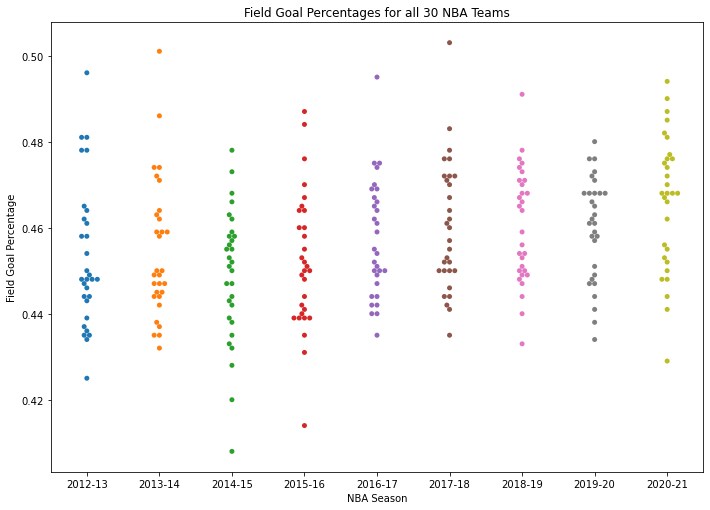

In [28]:
# explore the distribution of field goal percentage (FG_PCT) among all 30 teams
plt.figure(figsize=(11.7, 8.27))

ax = sns.swarmplot(data=team_all, x='Season', y='FG_PCT')
ax.set(title='Field Goal Percentages for all 30 NBA Teams')
ax.set(ylabel='Field Goal Percentage')
ax.set(xlabel='NBA Season')
plt.savefig('FG_PCT.png', dpi=300)

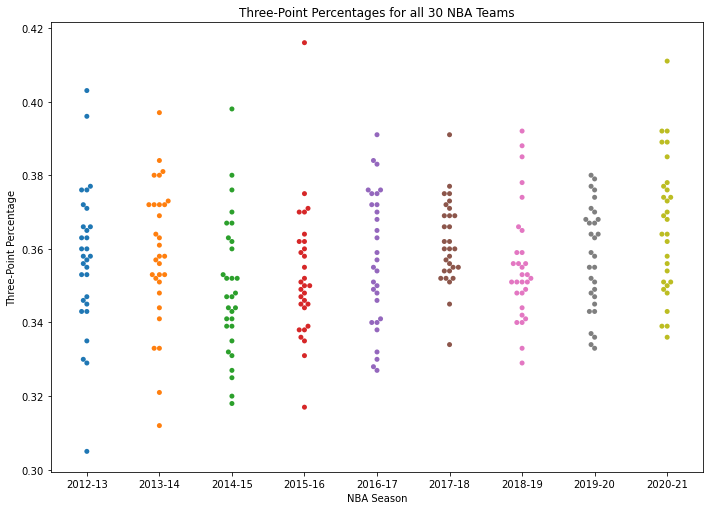

In [29]:
# explore the distribution of 3-point percentage (FG3_PCT) among all 30 teams
plt.figure(figsize=(11.7, 8.27))

ax = sns.swarmplot(data=team_all, x='Season', y='FG3_PCT')
ax.set(title='Three-Point Percentages for all 30 NBA Teams')
ax.set(ylabel='Three-Point Percentage')
ax.set(xlabel='NBA Season')
plt.savefig('FG3_PCT.png', dpi=300)

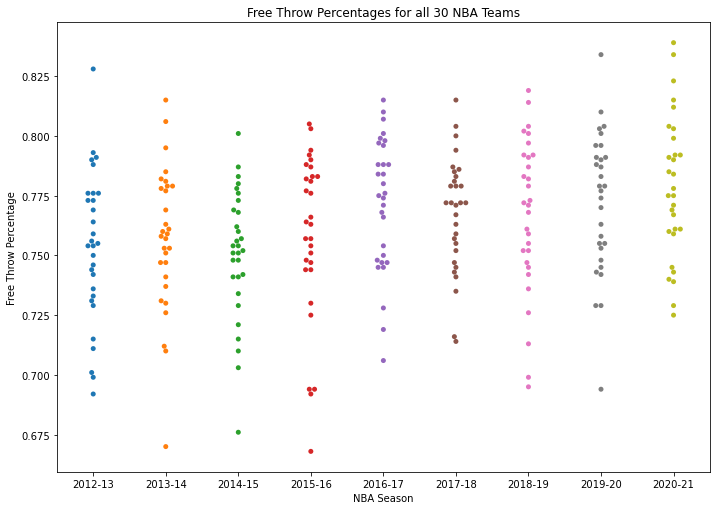

In [30]:
# explore the distribution of free throw percentage (FT_PCT) among all 30 teams
plt.figure(figsize=(11.7, 8.27))

ax = sns.swarmplot(data=team_all, x='Season', y='FT_PCT')
ax.set(title='Free Throw Percentages for all 30 NBA Teams')
ax.set(ylabel='Free Throw Percentage')
ax.set(xlabel='NBA Season')
plt.savefig('FT_PCT.png', dpi=300)

#### Comparing shooting performance between conferences
* We wanted to examine if there were any differences in shooting performance between the two conferences.
* Overall, it seems like the shooting performances among western conference teams have a larger variability compared to the eastern conference teams.
* Over the years, the eastern conference seemed to have improved generally as an entire conference for all 3 shooting metrics, while the western conference did not seem to have an improving trend.
* FG percentage, in particular, significantly improved for the eastern conference teams over the years.

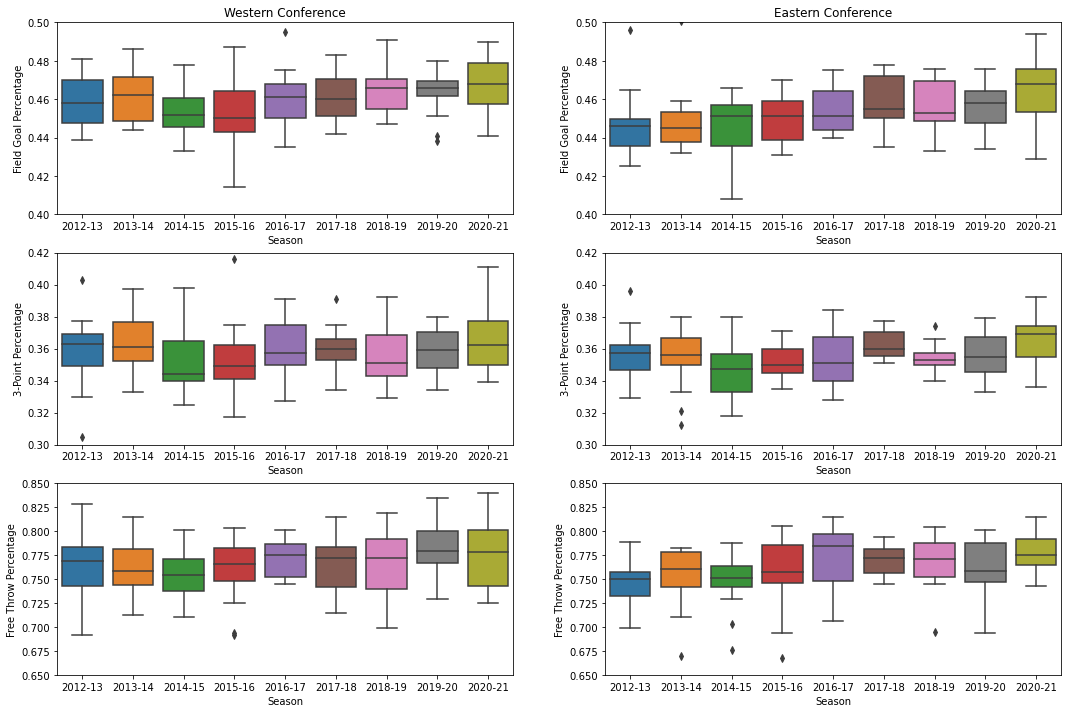

In [31]:
# compare shooting metrics between conferences
team_all_west = team_all.loc[team_all['Conference']=='West', ('Season','FG_PCT','FG3_PCT','FT_PCT')]
team_all_east = team_all.loc[team_all['Conference']=='East', ('Season','FG_PCT','FG3_PCT','FT_PCT')]

fig, axs = plt.subplots(3, 2, figsize=(18,12), sharey=False, sharex=False)
#fig.suptitle('Comparison among Conferences')

sns.boxplot(ax=axs[0,0], data=team_all_west, x='Season', y='FG_PCT')
axs[0,0].set_title('Western Conference')
axs[0,0].set_ylabel('Field Goal Percentage')
axs[0,0].set_ylim(.4, .5)

sns.boxplot(ax=axs[1,0], data=team_all_west, x='Season', y='FG3_PCT')
axs[1,0].set_ylabel('3-Point Percentage')
axs[1,0].set_ylim(.3, .42)

sns.boxplot(ax=axs[2,0], data=team_all_west, x='Season', y='FT_PCT')
axs[2,0].set_ylabel('Free Throw Percentage')
axs[2,0].set_ylim(.65, .85)

sns.boxplot(ax=axs[0,1], data=team_all_east, x='Season', y='FG_PCT')
axs[0,1].set_title('Eastern Conference')
axs[0,1].set_ylabel('Field Goal Percentage')
axs[0,1].set_ylim(.4, .5)

sns.boxplot(ax=axs[1,1], data=team_all_east, x='Season', y='FG3_PCT')
axs[1,1].set_ylabel('3-Point Percentage')
axs[1,1].set_ylim(.3, .42)

sns.boxplot(ax=axs[2,1], data=team_all_east, x='Season', y='FT_PCT')
axs[2,1].set_ylabel('Free Throw Percentage')
axs[2,1].set_ylim(.65, .85)

plt.savefig('Shooting_conf_boxplots.png', dpi=600)

#### Comparing team plus/minus and winning percentage over the years
* There was a positive correlation between team plus/minus and winning percentage, regardless of season, conference or division.
* Visually, by looking at the upper right quadrant of each chart, it seems that there were more western conference teams over the 9 seasons with a winning record (win percent > 50%) and a positive plus/minus.
* Likewise, in the eastern conference, there were more teams in the bottom left quadrant i.e. losing record (win percent < 50%) and negative plus/minus.

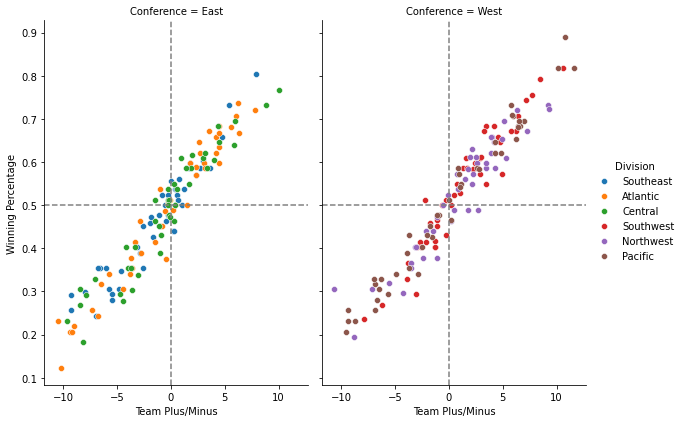

In [32]:
# examine correlation between winning percentage and plus/minus
team_all['PLUS_MINUS_AVG'] = np.true_divide(team_all['PLUS_MINUS'], team_all['GP'])

g = sns.FacetGrid(team_all, col='Conference', hue='Division', height=6, aspect=.7)
g.map(sns.scatterplot, 'PLUS_MINUS_AVG', 'W_PCT', x_jitter=.1)

g.add_legend()
g.set_axis_labels('Team Plus/Minus', 'Winning Percentage')

ax1, ax2 = g.axes[0]

ax1.axhline(0.5, ls='--', color='grey')
ax2.axhline(0.5, ls='--', color='grey')

ax1.axvline(0, ls='--', color='grey')
ax2.axvline(0, ls='--', color='grey')

plt.savefig('Corr_WPCT_PLUSMINUS.png', dpi=300)

In [33]:
# look at the different data types for player stats
player_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4544 entries, 0 to 539
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAYER_ID             4544 non-null   int64  
 1   PLAYER_NAME           4544 non-null   object 
 2   NICKNAME              4544 non-null   object 
 3   TEAM_ID               4544 non-null   float64
 4   TEAM_ABBREVIATION     4544 non-null   object 
 5   AGE                   4544 non-null   float64
 6   GP                    4544 non-null   int64  
 7   W                     4544 non-null   int64  
 8   L                     4544 non-null   int64  
 9   W_PCT                 4544 non-null   float64
 10  MIN                   4544 non-null   float64
 11  FGM                   4544 non-null   int64  
 12  FGA                   4544 non-null   int64  
 13  FG_PCT                4544 non-null   float64
 14  FG3M                  4544 non-null   int64  
 15  FG3A                  

#### Comparing player plus/minus and fantasy points across all seasons
* This was an interesting observation. It seemed that the majority of players had plus/minus between the range of -5 to +5, even if they had high fantasy points in the ranges above 40.
* There were only a handful of players that had plus/minus of more than 10 across either conference.
    * For the eastern conference, there were only 5 players across all 9 seasons with plus/minus of more than 10, and 3 were from the Atlantic Division.
    * For the western conference, there were 11 players across all 9 seasons with plus/minus of more than 10, and all except one were from the Pacific Division.
* What really stood out was the eastern conference player with a plus/minus close to 30, yet his fantasy points were only about 30.
* The plot showed that higher plus/minus scores need not necessarily mean a higher fantasy point score, which also indirectly meant that players who stuffed the stat sheet more might not have a positive impact on their teams at all times.

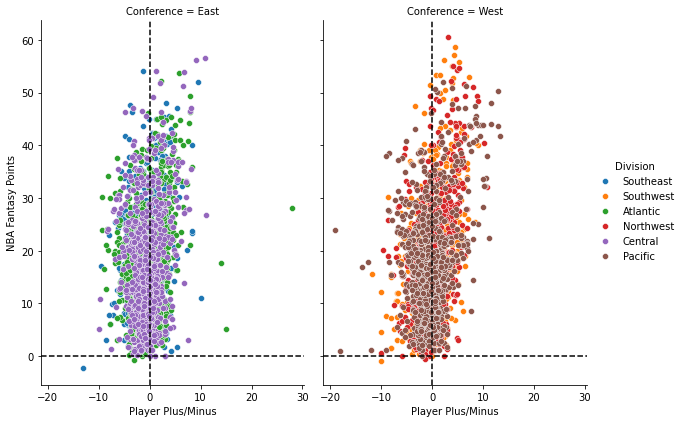

In [34]:
# correlation between player plus/minus and fantasy points
player_all['PLUS_MINUS_AVG'] = np.true_divide(player_all['PLUS_MINUS'], player_all['GP'])
player_all['FANTASY_PTS_AVG'] = np.true_divide(player_all['NBA_FANTASY_PTS'], player_all['GP'])

g = sns.FacetGrid(player_all, col='Conference', hue='Division', height=6, aspect=.7)
g.map(sns.scatterplot, 'PLUS_MINUS_AVG', 'FANTASY_PTS_AVG', x_jitter=.1)

g.add_legend()
g.set_axis_labels('Player Plus/Minus', 'NBA Fantasy Points')

ax1, ax2 = g.axes[0]

ax1.axhline(0, ls='--', color='black')
ax2.axhline(0, ls='--', color='black')

ax1.axvline(0, ls='--', color='black')
ax2.axvline(0, ls='--', color='black')

plt.savefig('Corr_FANTASYPTS_PLUSMINUS.png', dpi=300)

#### Investigating correlation among per-game metrics for players
* NBA players tend to improve their game or adjust their playing styles to their team strategies as they progress or change teams. The varying performance of players across the years is further complicated by teammate chemistry, player strength and conditioning, injuries, and many other factors. 
* Hence, to examine correlation among different per-game metrics, we look at each individual player in each season as a unique individual i.e. LeBron James in the 2013-14 season is assumed to be different from the version of LeBron James in the 2019-20 season.
* Correlations found:
    * Points per-game (PPG) vs minutes per-game (MPG): It seems like there is a slight exponential relationship between PPG and MPG. As MPG increases, PPG increases gradually up till about 30 MPG and then increases exponentially. This shows that below 30 MPG, players that tend to play more mins also score more. However players who play more than 30 MPG, there is a larger variation in the number of points these players can score, which could be an indication of a larger varying skill level (the good vs the great players) among these players.
    * PPG and assists per-game (APG) vs turnovers per-game (TOPG): For both PPG and APG, players with higher values of either metric typically also had a higher TOPG. This generally made sense as players with high PPG or APG would likely be players who handled the ball or controlled plays more often during the game. By probability alone, these players were also more likely to turn the ball over more often.
* Metrics with obviously no correlation:
    * APG vs blocks per-game (BPG): The majority of points are clustered near the y-axis and x-axis, indicating that neither metric had a positive or negative influence on the other. This made sense as it was rare in the NBA to have players who could pass well (i.e. more assists) also contribute to more blocks each game. These were the rare breed of passing big men (e.g. Nikola Jokic, Marc Gasol) or ultra athletic guards (e.g. Russell Westbrook).

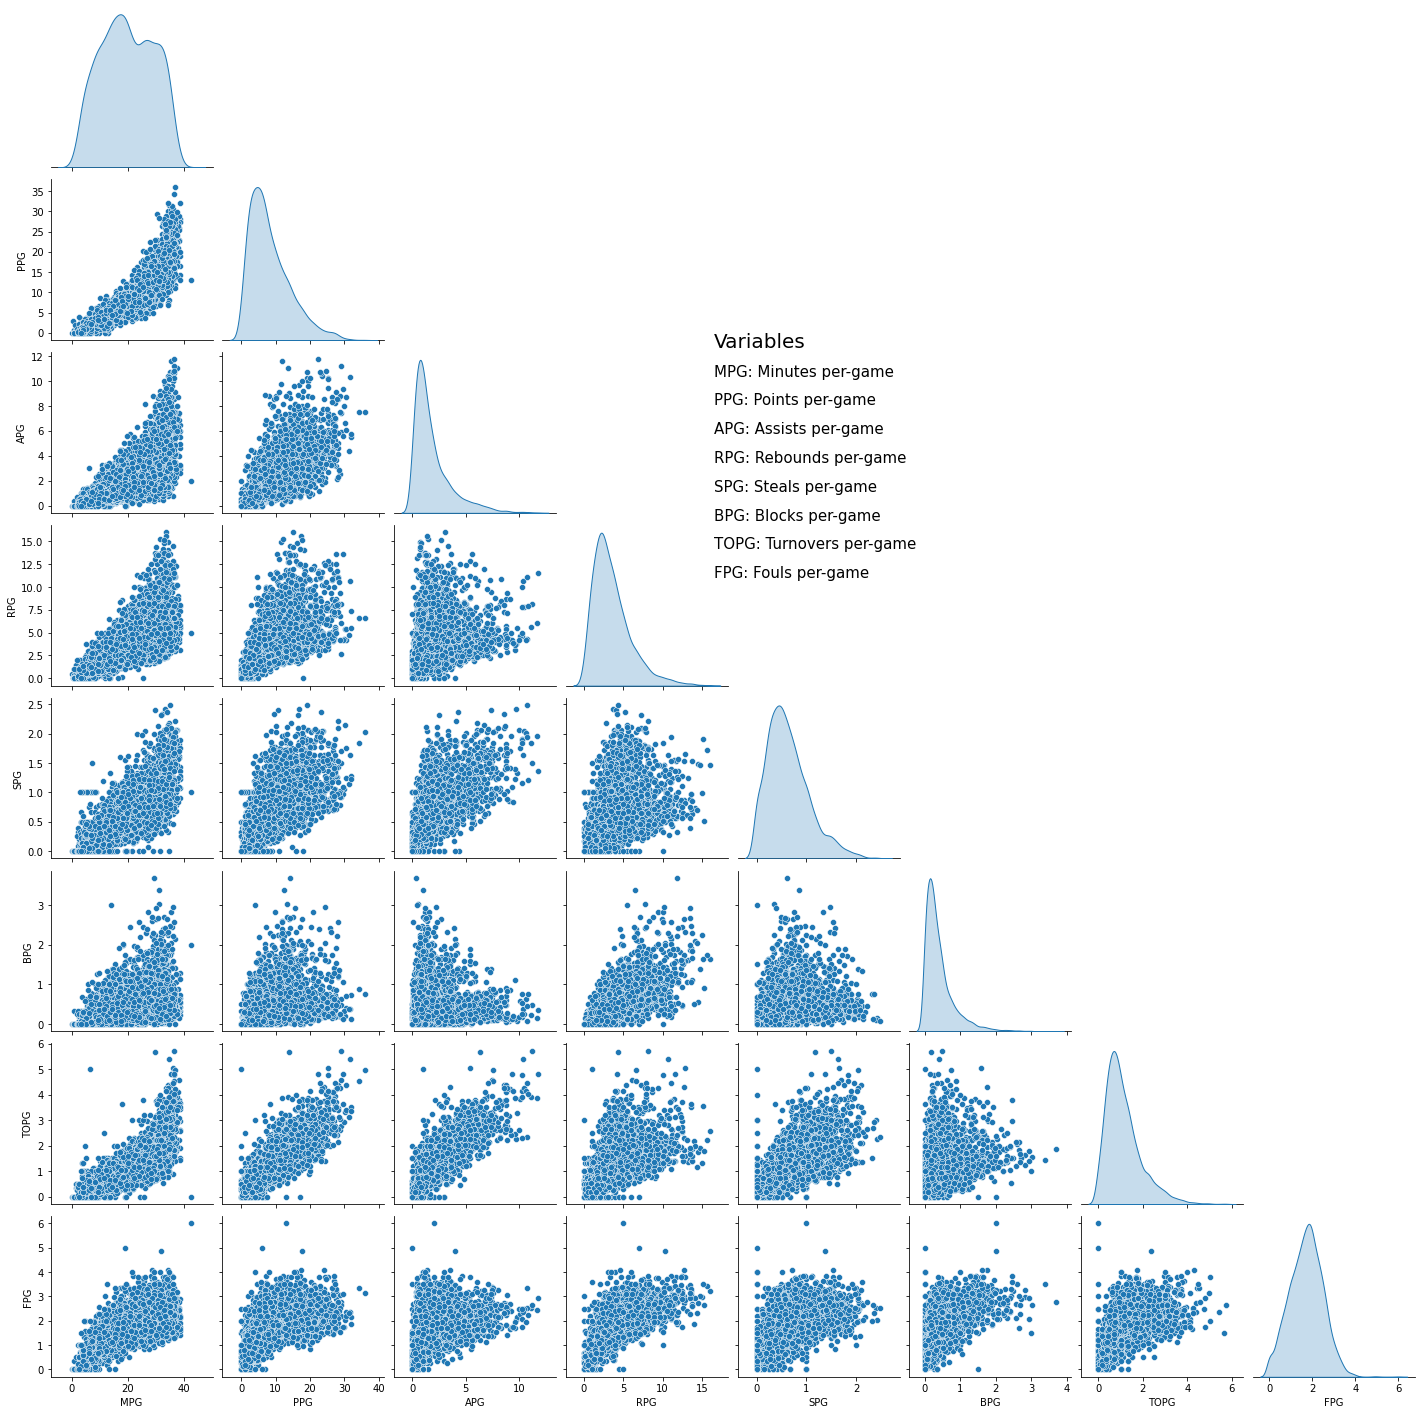

In [35]:
# calculate per-game values for each metric
player_all['MPG'] = np.true_divide(player_all['MIN'], player_all['GP'])
player_all['FMPG'] = np.true_divide(player_all['FGM'], player_all['GP'])
player_all['FAPG'] = np.true_divide(player_all['FGA'], player_all['GP'])
player_all['3MPG'] = np.true_divide(player_all['FG3M'], player_all['GP'])
player_all['3APG'] = np.true_divide(player_all['FG3A'], player_all['GP'])
player_all['TMPG'] = np.true_divide(player_all['FTM'], player_all['GP'])
player_all['TAPG'] = np.true_divide(player_all['FTA'], player_all['GP'])
player_all['ORPG'] = np.true_divide(player_all['OREB'], player_all['GP'])
player_all['DRPG'] = np.true_divide(player_all['DREB'], player_all['GP'])
player_all['RPG'] = np.true_divide(player_all['REB'], player_all['GP'])
player_all['APG'] = np.true_divide(player_all['AST'], player_all['GP'])
player_all['TOPG'] = np.true_divide(player_all['TOV'], player_all['GP'])
player_all['SPG'] = np.true_divide(player_all['STL'], player_all['GP'])
player_all['BPG'] = np.true_divide(player_all['BLK'], player_all['GP'])
player_all['BAPG'] = np.true_divide(player_all['BLKA'], player_all['GP'])
player_all['FPG'] = np.true_divide(player_all['PF'], player_all['GP'])
player_all['FDPG'] = np.true_divide(player_all['PFD'], player_all['GP'])
player_all['PPG'] = np.true_divide(player_all['PTS'], player_all['GP'])

# examine if there are any correlations between the key per-game metrics
# mins, pts, ast, reb, stls, blks, TOs, fouls
p = sns.pairplot(player_all[['MPG', 'PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TOPG', 'FPG']],
                 diag_kind='kde', kind='scatter', corner=True)
p.fig.text(.5, .75, 'Variables', fontsize=20)
p.fig.text(.5, .73, 'MPG: Minutes per-game', fontsize=15)
p.fig.text(.5, .71, 'PPG: Points per-game', fontsize=15)
p.fig.text(.5, .69, 'APG: Assists per-game', fontsize=15)
p.fig.text(.5, .67, 'RPG: Rebounds per-game', fontsize=15)
p.fig.text(.5, .65, 'SPG: Steals per-game', fontsize=15)
p.fig.text(.5, .63, 'BPG: Blocks per-game', fontsize=15)
p.fig.text(.5, .61, 'TOPG: Turnovers per-game', fontsize=15)
p.fig.text(.5, .59, 'FPG: Fouls per-game', fontsize=15)

plt.savefig('Pairplot_PG.png', dpi=300)

### Step 4 (4th Qtr): Answering the Project Objective (Time to close out the game) 

#### Consolidating what we know so far
* From the first 3 steps, we managed to understand both team and player datasets better and also gleaned some insights into team and player performances over the 9 seasons.
* Next, we will use this knowledge to assess our project objective, which is to determine the impact of the compressed 2019/20 and 2020/21 NBA seasons on team performance, player performance and player minutes.
* Specifically, we will perform statistical testing to ascertain this impact, and evaluate if the hypothesis holds true.

#### Test #1: Determine if shooting performance of teams were statistically different in 2019/20 and 2020/21 (post-COVID; 2 seasons) compared to 2012/13 to 2018/19 (pre-COVID; 7 seasons)
* From Step 3, we found that field goal (FG) and free throw (FT) percentages seemed to improve over the years, but 3-point percentages (3PT) did not show marked improvement.
* We will test this statistically for all teams, and also breakdown by conferences and divisions to examine if there are any differences.
* First, let's determine if each of these distributions show normality, and look at their means and standard deviations.

In [36]:
# split team data into pre- and post-COVID periods
pre_covid_seasons = ['2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19']
post_covid_seasons = ['2019-20','2020-21']
team_pre_covid = team_all.loc[team_all['Season'].isin(pre_covid_seasons)]
team_post_covid = team_all.loc[team_all['Season'].isin(post_covid_seasons)]

# check for normality of FG_PCT, FT_PCT and FG3_PCT values, and calculate mean and SD
from scipy import stats
from scipy.stats import shapiro
import statistics

columns = [team_pre_covid['FG_PCT'], team_pre_covid['FT_PCT'], team_pre_covid['FG3_PCT'],
          team_post_covid['FG_PCT'], team_post_covid['FT_PCT'], team_post_covid['FG3_PCT']] 
names = ['Pre-COVID FG pct', 'Pre-COVID FT pct', 'Pre-COVID 3PT pct',
        'Post-COVID FG pct', 'Post-COVID FT pct', 'Post-COVID 3PT pct']

for name, column in zip(names, columns):
    stat, p = shapiro(column)
    mean = statistics.mean(column)
    sd = statistics.stdev(column)
    print('%s test statistic = %.3f, p = %.3f' % (name, stat, p))
    if p > 0.05:
        print('%s is likely normally distributed' % (name))
    else:
        print('%s is likely not normally distributed' % (name))
    print('Mean = %.3f, Standard Deviation = %.3f' % (mean, sd))
    print('')

Pre-COVID FG pct test statistic = 0.986, p = 0.037
Pre-COVID FG pct is likely not normally distributed
Mean = 0.455, Standard Deviation = 0.015

Pre-COVID FT pct test statistic = 0.976, p = 0.001
Pre-COVID FT pct is likely not normally distributed
Mean = 0.761, Standard Deviation = 0.030

Pre-COVID 3PT pct test statistic = 0.994, p = 0.572
Pre-COVID 3PT pct is likely normally distributed
Mean = 0.356, Standard Deviation = 0.017

Post-COVID FG pct test statistic = 0.986, p = 0.724
Post-COVID FG pct is likely normally distributed
Mean = 0.463, Standard Deviation = 0.014

Post-COVID FT pct test statistic = 0.989, p = 0.859
Post-COVID FT pct is likely normally distributed
Mean = 0.775, Standard Deviation = 0.030

Post-COVID 3PT pct test statistic = 0.977, p = 0.302
Post-COVID 3PT pct is likely normally distributed
Mean = 0.362, Standard Deviation = 0.017



Using the Shapiro-Wilk test (Ref: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test), we found that the pre-COVID FG and FT percentages may not be normally distributed. However, we would still be able to perform z-tests to compare these distributions as the number of samples is sufficiently large (pre-COVID number of values = 30 x 7 seasons = 210).

Also, the standard deviations of each of these shooting distributions are fairly similar, hence we would not need to perform any further adjustments for the z-tests.

In [37]:
# z-test for comparison of means for FG_PCT, FT_PCT and FG3_PCT
import statsmodels
from statsmodels.stats.weightstats import ztest

# FG pct, FT pct, 3PT pct: pre-covid vs post-covid
pre_cols = [team_pre_covid['FG_PCT'], team_pre_covid['FT_PCT'], team_pre_covid['FG3_PCT']]
post_cols = [team_post_covid['FG_PCT'], team_post_covid['FT_PCT'], team_post_covid['FG3_PCT']] 
pre_names = ['Pre-COVID FG pct', 'Pre-COVID FT pct', 'Pre-COVID 3PT pct']
post_names = ['Post-COVID FG pct', 'Post-COVID FT pct', 'Post-COVID 3PT pct']

for pre_name, pre_col, post_name, post_col in zip(pre_names, pre_cols, post_names, post_cols):
    tstat, p = ztest(pre_col, post_col)
    if p < 0.05: # test at 95% confidence level
        print('%s is significantly different from %s, at a 95%% confidence level and p-value of %.3f.' % (pre_name, post_name, p))
    else:
        print('%s is not statistically different from %s, at a 95%% confidence level.' % (pre_name, post_name))
    print('')

Pre-COVID FG pct is significantly different from Post-COVID FG pct, at a 95% confidence level and p-value of 0.001.

Pre-COVID FT pct is significantly different from Post-COVID FT pct, at a 95% confidence level and p-value of 0.001.

Pre-COVID 3PT pct is significantly different from Post-COVID 3PT pct, at a 95% confidence level and p-value of 0.022.



#### Findings from z-test for comparison of team shooting performance pre- and post-COVID
* The z-tests seemed to indicate that there was a statistically significant difference in all three shooting metrics (field goal percentage, free throw percentage, and 3-point percentage) between the pre-COVID seasons and the post-COVID seasons.
* From our previous exploratory analysis, we found that the median shooting performances of teams have improved over the seasons.
* Hence, it seems like teams generally tend to shoot better in the seasons affected by COVID-19.
* One possible reason for this may be:
    * Generally in the recent decade, the NBA had gradually evolved from a "big man" dominant league into a "shooters' league". (Ref: https://www.espn.com.sg/nba/story/_/id/28312678/how-deep-audacious-3-pointers-taking-nba)
    * What this means is that teams are taking more long range shots, and at the same time making these shots as well. This increase in shooting attempts may be the reason why teams appear to be shooting better over the years. And the COVID-19 pandemic did not seem to negatively impact or slow down this phenomenon. Hence, it may not be that COVID-19 made teams shoot better, the trend was already set in motion to start with.
    * To confirm this, we can do a quick look at shooting attempts for each team over the years.

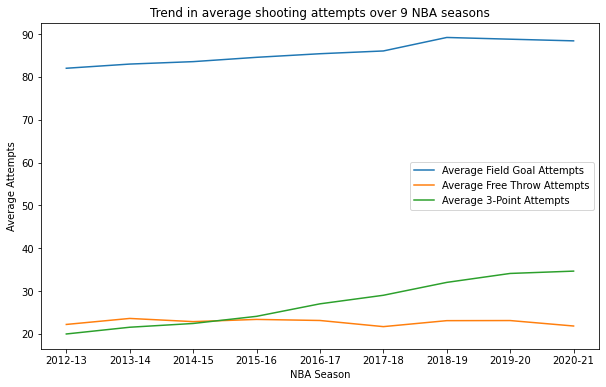

<Figure size 432x288 with 0 Axes>

In [38]:
# to determine if average shooting attempts for teams did increase over each season (FGA, FTA, FG3A)
# find mean attempts per team first
team_all['FGA_AVG'] = np.true_divide(team_all['FGA'], team_all['GP'])
team_all['FTA_AVG'] = np.true_divide(team_all['FTA'], team_all['GP'])
team_all['FG3A_AVG'] = np.true_divide(team_all['FG3A'], team_all['GP'])

# then find mean attempts across all 30 teams for each season
team_all_mean = team_all.groupby('Season').agg({'FGA_AVG': 'mean', 'FTA_AVG': 'mean', 'FG3A_AVG': 'mean'})

plt.figure(figsize=(10,6))
plt.plot(team_all_mean['FGA_AVG'], label = 'Average Field Goal Attempts')
plt.plot(team_all_mean['FTA_AVG'], label = 'Average Free Throw Attempts')
plt.plot(team_all_mean['FG3A_AVG'], label = 'Average 3-Point Attempts')
plt.xlabel('NBA Season')
plt.ylabel('Average Attempts')
plt.title('Trend in average shooting attempts over 9 NBA seasons')
plt.legend(loc='best')
plt.show()

plt.savefig('Shooting_attempts.png', dpi=300)

Here, we can tell that both field goal and 3-point attempts have clearly increased over each season, with free throw attempts remaining fairly consistent. Hence, the improvement in shooting percentages in the post-COVID seasons compared to pre-COVID seasons may not be a result of the pandemic, but rather a "shooting phenomenon" that the league had already been experiencing.

#### Test #2: Determine if key performance metrics of players were statistically different in 2019/20 and 2020/21 (post-COVID; 2 seasons) compared to 2012/13 to 2018/19 (pre-COVID; 7 seasons)
* Similar to our exploratory analysis in Step 3, we will look at the key per-game metrics for players, namely minutes, points, assists, rebounds, steals, blocks, turnovers, and fouls per game.
* We previously found that players with higher points per game (PPG) tend to also log higher minutes per game (MPG). Players with higher PPG or assists per game (APG) also seemed to have higher turnovers per game (TOPG).
* At the same time, we also found some metrics with no obvious correlation, such as APG and blocks per game (BPG).
* Now, we will take a step further and look at the differences in these per-game metrics in the pre-COVID and post-COVID seasons.

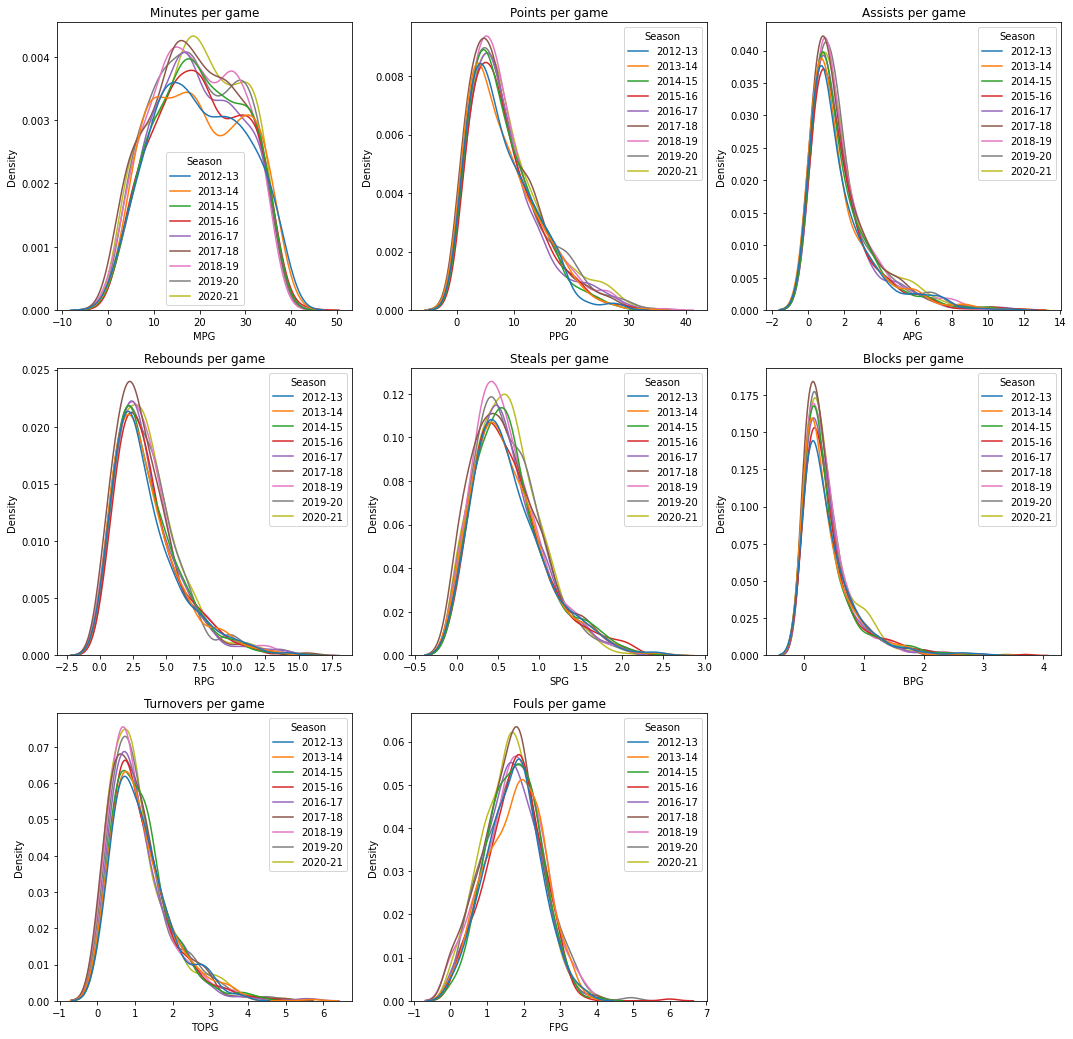

In [39]:
# look at the distribution of key player performance metrics over the 9 seasons
fig, axs = plt.subplots(3, 3, figsize=(18,18), sharey=False, sharex=False)

sns.kdeplot(ax=axs[0,0], data=player_all, x='MPG', hue='Season')
axs[0,0].set_title('Minutes per game')

sns.kdeplot(ax=axs[0,1], data=player_all, x='PPG', hue='Season')
axs[0,1].set_title('Points per game')

sns.kdeplot(ax=axs[0,2], data=player_all, x='APG', hue='Season')
axs[0,2].set_title('Assists per game')

sns.kdeplot(ax=axs[1,0], data=player_all, x='RPG', hue='Season')
axs[1,0].set_title('Rebounds per game')

sns.kdeplot(ax=axs[1,1], data=player_all, x='SPG', hue='Season')
axs[1,1].set_title('Steals per game')

sns.kdeplot(ax=axs[1,2], data=player_all, x='BPG', hue='Season')
axs[1,2].set_title('Blocks per game')

sns.kdeplot(ax=axs[2,0], data=player_all, x='TOPG', hue='Season')
axs[2,0].set_title('Turnovers per game')

sns.kdeplot(ax=axs[2,1], data=player_all, x='FPG', hue='Season')
axs[2,1].set_title('Fouls per game')

axs[2,2].axis('off')

plt.savefig('Player_per_game.png', dpi=300)

Generally, apart from minutes per game, the distribution of per-game metrics for each season seems fairly similar. We will next determine statistically if any of these metrics are indeed different in the post-COVID seasons.

For player minutes, we will look into this separately in Test #3 instead.

In [40]:
# split players data into pre- and post-COVID periods
pre_covid_seasons = ['2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19']
post_covid_seasons = ['2019-20','2020-21']
player_pre_covid = player_all.loc[player_all['Season'].isin(pre_covid_seasons)]
player_post_covid = player_all.loc[player_all['Season'].isin(post_covid_seasons)]

# compare pre-COVID and post-COVID player key performance metrics
pre_cols = [player_pre_covid['PPG'], player_pre_covid['APG'], player_pre_covid['RPG'], player_pre_covid['SPG'],
            player_pre_covid['BPG'], player_pre_covid['TOPG'], player_pre_covid['FPG']]
post_cols = [player_post_covid['PPG'], player_post_covid['APG'], player_post_covid['RPG'], player_post_covid['SPG'], 
             player_post_covid['BPG'], player_post_covid['TOPG'], player_post_covid['FPG']]
pre_names = ['Pre-COVID PPG', 'Pre-COVID APG', 'Pre-COVID RPG', 'Pre-COVID SPG', 
             'Pre-COVID BPG', 'Pre-COVID TOPG', 'Pre-COVID FPG']
post_names = ['Post-COVID PPG', 'Post-COVID APG', 'Post-COVID RPG', 'Post-COVID SPG', 
             'Post-COVID BPG', 'Post-COVID TOPG', 'Post-COVID FPG']

for pre_name, pre_col, post_name, post_col in zip(pre_names, pre_cols, post_names, post_cols):
    tstat, p = ztest(pre_col, post_col)
    pre_mean = statistics.mean(pre_col)
    pre_sd = statistics.stdev(pre_col)
    post_mean = statistics.mean(post_col)
    post_sd = statistics.stdev(post_col)
    if p < 0.05: # test at 95% confidence level
        print('%s is significantly different from %s, at a 95%% confidence level and p-value of %.3f.' % (pre_name, post_name, p))
    else:
        print('%s is not statistically different from %s, at a 95%% confidence level.' % (pre_name, post_name))
    print('%s mean = %.3f, SD = %.3f; %s mean = %.3f, SD = %.3f' % (pre_name, pre_mean, pre_sd, post_name, post_mean, post_sd))
    print('')

Pre-COVID PPG is significantly different from Post-COVID PPG, at a 95% confidence level and p-value of 0.005.
Pre-COVID PPG mean = 8.249, SD = 5.813; Post-COVID PPG mean = 8.835, SD = 6.426

Pre-COVID APG is significantly different from Post-COVID APG, at a 95% confidence level and p-value of 0.047.
Pre-COVID APG mean = 1.829, SD = 1.769; Post-COVID APG mean = 1.952, SD = 1.815

Pre-COVID RPG is not statistically different from Post-COVID RPG, at a 95% confidence level.
Pre-COVID RPG mean = 3.536, SD = 2.459; Post-COVID RPG mean = 3.632, SD = 2.436

Pre-COVID SPG is not statistically different from Post-COVID SPG, at a 95% confidence level.
Pre-COVID SPG mean = 0.632, SD = 0.429; Post-COVID SPG mean = 0.618, SD = 0.394

Pre-COVID BPG is not statistically different from Post-COVID BPG, at a 95% confidence level.
Pre-COVID BPG mean = 0.394, SD = 0.427; Post-COVID BPG mean = 0.404, SD = 0.410

Pre-COVID TOPG is not statistically different from Post-COVID TOPG, at a 95% confidence level.
P

Here, we found that at a 95% level of confidence, both points per game (PPG) and assists per game (APG) were significantly different between the pre-COVID and post-COVID seasons. In fact, for both metrics, the post-COVID mean values were higher than the pre-COVID mean values, indicating an improvement in average player performance in terms of PPG and APG. This seemed to suggest that in general, players played better in the post-COVID compressed seasons. 

We will next look at whether there is a time-dependent relationship in PPG and APG i.e. do both values naturally increase over time? We do this by plotting a time series regression for PPG and APG and examine their coefficient of determination ("R squared") to see if the values show a positive increase over time.

In [41]:
# examine regression metrics for both PPG and APG, for pre-COVID seasons only and all seasons
# to perform time series regression, we will convert the 'Season' variable into a time value
player_all['Season_start_yr'] = player_all['Season'].astype(str).str[:4]
player_all['Season_start_yr'] = pd.to_datetime(player_all['Season_start_yr']).dt.year
player_pre_covid['Season_start_yr'] = player_pre_covid['Season'].astype(str).str[:4]
player_pre_covid['Season_start_yr'] = pd.to_datetime(player_pre_covid['Season_start_yr']).dt.year

seasons = [player_all['Season_start_yr'], player_pre_covid['Season_start_yr'], 
          player_all['Season_start_yr'], player_pre_covid['Season_start_yr']]
metrics = [player_all['PPG'], player_pre_covid['PPG'],
         player_all['APG'], player_pre_covid['APG']]
names = ['Points per game (All seasons)', 'Points per game (Pre-COVID seasons)',
        'Assists per game (All seasons)', 'Assists per game (Pre-COVID seasons)']

from scipy import stats
for season, metric, name in zip(seasons, metrics, names):
    r2 = stats.pearsonr(season, metric)[0]**2
    p = stats.pearsonr(season, metric)[1]
    print('%s: r^2 = %.3f, p = %.3f' % (name, r2, p))
    print('')

Points per game (All seasons): r^2 = 0.002, p = 0.001

Points per game (Pre-COVID seasons): r^2 = 0.001, p = 0.082

Assists per game (All seasons): r^2 = 0.001, p = 0.029

Assists per game (Pre-COVID seasons): r^2 = 0.000, p = 0.316



Here we see that whether we look at all nine seasons from 2012, or just looking at the pre-COVID seasons (start years: 2012 to 2018), there does not seem to be a positive correlation between time and either PPG or APG. The R-squared values for all 4 regression series are close to zero, indicating a non-linear relationship. Hence, the improvement in PPG and APG during the post-COVID periods is likely due to other reasons. Some possibilities include a faster pace of games (Ref: https://www.basketball-reference.com/leagues/NBA_stats_per_game.html) leading to more points and assists overall, and also more 3-point shots attempted over the years (as highlighted from Test #1).

#### Test #3: Determine if number of minutes played by players were statistically different in 2019/20 and 2020/21 (post-COVID; 2 seasons) compared to 2012/13 to 2018/19 (pre-COVID; 7 seasons)
* From our exploratory analysis in Step 3, we found that points per game (PPG) and minutes per game (MPG) were positively correlated.
* Here, we will examine if the average MPG in the pre-COVID and post-COVID seasons are statistically different. As each NBA game duration is fixed at 48 minutes (not accounting for overtime games), by theory the average MPG of all players should not deviate largely over the years.
* In addition, we will investigate if there had been any large shifts in MPG for players of different performing levels (determined by their average plus/minus scores per season) over the years.

In [42]:
# split players data into pre- and post-COVID periods
pre_covid_seasons = ['2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19']
post_covid_seasons = ['2019-20','2020-21']
player_pre_covid = player_all.loc[player_all['Season'].isin(pre_covid_seasons)]
player_post_covid = player_all.loc[player_all['Season'].isin(post_covid_seasons)]

# compare pre-COVID and post-COVID player key performance metrics
pre_cols = [player_pre_covid['MPG']]
post_cols = [player_post_covid['MPG']]
pre_names = ['Pre-COVID MPG']
post_names = ['Post-COVID MPG']

for pre_name, pre_col, post_name, post_col in zip(pre_names, pre_cols, post_names, post_cols):
    tstat, p = ztest(pre_col, post_col)
    pre_mean = statistics.mean(pre_col)
    pre_sd = statistics.stdev(pre_col)
    post_mean = statistics.mean(post_col)
    post_sd = statistics.stdev(post_col)
    if p < 0.05: # test at 95% confidence level
        print('%s is significantly different from %s, at a 95%% confidence level and p-value of %.3f.' % (pre_name, post_name, p))
    else:
        print('%s is not statistically different from %s, at a 95%% confidence level.' % (pre_name, post_name))
    print('%s mean = %.3f, SD = %.3f; %s mean = %.3f, SD = %.3f' % (pre_name, pre_mean, pre_sd, post_name, post_mean, post_sd))
    print('')

Pre-COVID MPG is not statistically different from Post-COVID MPG, at a 95% confidence level.
Pre-COVID MPG mean = 19.841, SD = 9.326; Post-COVID MPG mean = 19.668, SD = 9.256



Since minutes per game (MPG) in general across the league were not significantly different between the pre-COVID and post-COVID seasons, we will next look if this also applies to all players regardless of their performance levels. We will use each player's season plus/minus average to group them into the following performance categories (Ref: https://www.basketball-reference.com/about/bpm2.html), and see how their MPG change over the seasons:

* +10.0 and above: All-time
* +8.0 to 9.9: MVP
* +6.0 to 7.9: All-NBA
* +4.0 to 5.9: All-star
* +2.0 to 3.9: Starter
* +0.0 to 1.9: Decent
* -2.0 to -0.1: Bench
* Below -2.0: End-of-bench

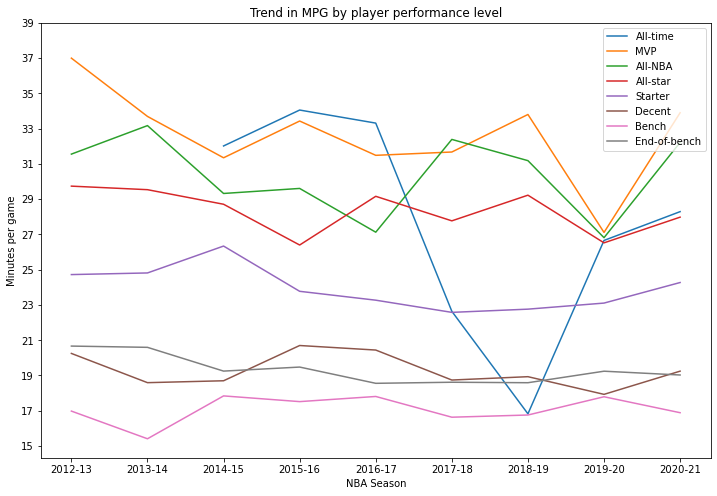

In [43]:
# categorise players into different performance levels based on plus/minus scores
player_all['PM_scale'] = np.where(player_all['PLUS_MINUS_AVG']>=10.0, 'All-time',
                               (np.where(((player_all['PLUS_MINUS_AVG']>=8.0) & (player_all['PLUS_MINUS_AVG']<10.0)), 'MVP',
                               (np.where(((player_all['PLUS_MINUS_AVG']>=6.0) & (player_all['PLUS_MINUS_AVG']<8.0)), 'All-NBA',
                               (np.where(((player_all['PLUS_MINUS_AVG']>=4.0) & (player_all['PLUS_MINUS_AVG']<6.0)), 'All-star',
                               (np.where(((player_all['PLUS_MINUS_AVG']>=2.0) & (player_all['PLUS_MINUS_AVG']<4.0)), 'Starter',
                               (np.where(((player_all['PLUS_MINUS_AVG']>=0.0) & (player_all['PLUS_MINUS_AVG']<2.0)), 'Decent',
                               (np.where(((player_all['PLUS_MINUS_AVG']>=-2.0) & (player_all['PLUS_MINUS_AVG']<0.0)), 'Bench',
                               (np.where(player_all['PLUS_MINUS_AVG']<-2.0, 'End-of-bench', 'Unknown')))))))))))))))

order = ['All-time', 'MVP', 'All-NBA', 'All-star', 'Starter', 'Decent', 'Bench', 'End-of-bench']
MPG_PM = player_all.groupby(['Season','PM_scale'])['MPG'].mean().unstack('PM_scale')[order]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(MPG_PM)
plt.ylabel('Minutes per game')
plt.yticks(np.arange(15, 40, step=2))
plt.xlabel('NBA Season')
plt.title('Trend in MPG by player performance level')
ax.legend(labels=order, loc='upper right')

plt.savefig('MPG_PM.png', dpi=300)

This was an interesting finding. We see that for the lower performing players i.e. 'Decent', 'Bench', and 'End-of-bench' players, the average MPG for each group remained fairly consistent over the years.

However, for the higher performing players i.e. 'MVP', 'All-NBA', and 'All-star' calibre players, the average MPG for each group fluctuates greatly between 27 to 37 minutes over the seasons. Moreover, there was an obvious drop to around 27 to 28 MPG for these 3 groups in the 2019/20 season, before resuming to average levels in the 2020/21 season. This could possibly be due to minutes restrictions set by teams on their star players to minimise injuries (as there have been multiple disruptions in games due to COVID-19 protocols which may affect player conditioning). Further analysis on this observation would be needed.

#### Summary of project findings
* Objective 1: Impact on team performance
    * We found that over the years, teams generally seemed to shoot better (as shooting percentages increased consistently) and this could be contributed by an increase in the number of shooting attempts on average.
    * Specifically, when looking at the shooting performance of the pre-COVID and post-COVID seasons, the performances were statistically significantly different at a 95% confidence level, but is unlikely to be due to the effect of the pandemic.
* Objective 2: Impact on player performance
    * Looking at the key player performance metrics, we found that points per game (PPG) and assists per game (APG) were significantly different in the post-COVID seasons compared to the pre-COVID seasons. Further detailed analysis revealed both PPG and APG mean values were higher in the post-COVID seasons. However, these were not found to be natural increases over time.
* Objective 3: Impact on player minutes
    * We found that overall, player minutes per game (MPG) were not significantly different in the pre-COVID and post-COVID seasons, at a 95% level of confidence. This was acceptable as in theory, average player minutes should not deviate much due to a fixed game duration of 48 minutes per game (not accounting for overtime games).
    * However, what was interesting to note was that among the higher performing players i.e. 'All-star' calibre players and above, we found that their average MPG fluctuates greatly over the seasons, and in particular, converged to around 27 to 28 MPG in the 2019/2020 season. This suggests that the COVID-19 restrictions could potentially have affected the amount of time star players could play in each game.

#### Limitations of study
* We were not able to account for the impact on performance of players who missed games during the post-COVID seasons due to contracting the COVID-19 disease or other quarantine measures.
* We did not have the data on player injuries across all seasons and so could not adjust for team and player performances affected by injuries of varying severity.
* The analysis mainly looked at the offensive statistics of teams and players e.g. shooting percentages, points per game. The study did not analyse defensive metrics such as opponent's points per game or opponent's ratings.
* It is a common phenomenon for the yearly NBA draft classes to differ in skill level and performance potential. (For example, the loaded draft class of 2003 with LeBron James, Dwyane Wade, Chris Bosh and Carmelo Anthony) In this study, we did not account for this difference over the nine seasons.

#### Conclusion

Overall, we found that the COVID-19 pandemic seemed to impact the 2019/20 and 2020/21 seasons in terms of player performances (PPG and APG increased) and at the same time appeared to restrict the number of minutes star players could play. Nonetheless, the pandemic did not seem to affect team performances in general, and trends in team shooting performance remained consistent across all seasons.